# Capstone Project by Ingo Ziegler 

# Predicting Student Performance and Improving Student Network Building in Virtual Learning Environments

## 1) The problem
Assisting students in face-to-face situations in academic settings is considered easier to handle because students can reach out in-person to advisors or other peers. Distance learning, however, doesn't allow for these circumstances. Constructive feedback addressed to the university, professors, or tutors by students is also easier to incorporate in-person because writing formal feedback to people you have never seen in reality creates a barrier which may hinder the needed communication to help students as needed. Nonetheless, a university - whether it is practicing distance-only learning or is starting to offer more online resources in part due to trends but also due to COVID-19 - might be interested in a system that assesses students in these virtual learning environments based on the only available information to them: demographic data, meta data of both offered courses (type of course, summer or winter term, course length) and activity in the the online course environment (e.g. clicks, dates of clicks), as well as which type of resources students used.

#### Main goal
We will build supervised learning models (logistic regression, decision tree and random forest, k-NN) that aim to classify a student profile into one of the 4 possible final result categories: pass with distinction, pass, withdrawn, or fail. The coefficients will be trained on this data set, i.e. historical students, which can then be used to predict the success of new, incoming students based on their course choice, demographic data, _expected activity, assessment submission dates, type of resources used, etc._
All features will be explained below.

#### Additional side tasks
Decision trees are naturally based on sequential, ranked decisions, which compelements the nature of our features very well. Students are faced with lots of decisions: for instance, which course to take, in which term, which resources to use, when to submit the exam, what is the expected level or activity. A decision tree model will, next to the prediction accuracy, shine light onto the most important decisions, where those features split, and how they are ranked. 

A scree plot will additionally provide an overview of the features that are contributing most to our classification task.

The k-NN algorithm can also be used to find and identify neighboring students, in effect suggesting peers with similar background and in similar situations. This enables the students to build closer connections, raise the student's motivation, and improve not only the students' results and experiences but also the university's alumni network.

## 2) The data
I noticed the dataset on the [University of California, Irvine, dataset repository](https://archive.ics.uci.edu/ml/datasets.php), which in its [explanation](https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset) links to the [analytics page](https://analyse.kmi.open.ac.uk/open_dataset) of the Open University, where you can download the dataset.

The dataset was initially published together with the following paper explaining all variables and the dataset structure.
> Kuzilek, J., Hlosta, M. & Zdrahal, Z. Open University Learning Analytics dataset. Sci Data 4, 170171 (2017). [https://doi.org/10.1038/sdata.2017.171](https://doi.org/10.1038/sdata.2017.171)


### Overview of Data Set
The data set contains information about students at _Open University_ in England in Virtual Learning Environments (VLE). As the paper notes in its `Background and Summary` section, this dataset is unique because it **combines student performance, demographic data, as well as interaction data between students and the virtual learning environment**, such as clicks and timing. Other datasets before have missed some of the three before mentioned aspects.

The data has been collected throughout the years 2013 and 2014 from seven courses out of the Open University's massive open online course (MOOC) catalogue. Open University has been founded to specifically provide distance learning opportunities to as many people as possible. Today, they are one of the biggest university suppliers of online education with around 170,000 registered students. 

Because Open University itself has been interested in student performance, they inform students at registration time that their interaction with the VLE will be tracked for research purposes. Specifically, each click a student does inside the environment will be recorded. This dataset is the anonymized result of such measures - in combination with demographic and underlying course data. 

Open University tracked performance of more than seven courses, and it is important to note that these seven courses have **not** been picked randomly out of the available data pool. In particular, only courses have been chosen that (see [here](https://www.nature.com/articles/sdata2017171) at section `Data selection`:
* at least 500 students are inside the course
* the module has been held at least two times
* the courses must be inside the VLE (not all courses are inside the VLE)
* a significant number (not further specified by Open University) of students fail the module

The university selected to publish seven courses that satisfy all the above criteria. Four modules are science, technology, engineering, mathematics (STEM) subjects, the other 3 courses are social sciences subjects. 

The total number of students across all considered modules is 38,239. Anonymization measures by Open University, however, reduced the number of available data points to 32,593 students.
___
#### Structure of EDA, Merging, and Cleaning
In the following section, I will describe and explore all 7 data sets on their own, i.e. not yet merged. All variables will be explained, their distribution among e.g. modules, presentation terms, or demographic background data. During this section, I will also search for and fill missing values, as well as encode certain features into categorical features which make more sense in the context of predicting student performance. I will also detect obviously impossible values and correct instead of drop them, where possible. I will **not yet** detect and drop outliers. As an additional note: it is not possible to explore feature-target relations at this stage as the variables are in different sub-sets and aren't structured in a way in which meaningful plots could be made.

After each of the 7 sets has been explored, I will start merging the sets together. As I will explain at relevant times in the merging process, the order of merging is very important. It is not possible to combine the data sets in every order as the keys on which to merge are only available in certain sub-sets. Therefore, it is vital to prepare and preprocess the sub-sets and keep certain columns longer than initially needed.

The result of our merging process is the 'final' dataframe. At this stage, I will start exploring feature distributions, detecting and dropping outliers, as well as visualizing and calculating statistics between features and the target variable. This is only possible now in a meaningful way because every feature needed to be merged and thus multiplied - where needed - to be structured around unique combinations of a student and an assessment. Before the merging, we had only, for instance, a separate sub-set with demographic data with no link to assessments and courses. As long as every observation of every feature had not been structured around a unique combination of student and assessment, it wasn't possible to know the final distribution of each feature.
___
We will now start with the EDA of each of the 7 sub-sets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Courses Set
Identifies all available modules (courses) and their presentation terms and lengths

* `code_module` --> identifier for the module
* `code_presentation` --> combination of year and summer or winter term. `B` represents terms starting in February, `J` represents terms starting in October
* `length` --> length of module presentation in days

In [2]:
# read the file
courses = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/courses.csv")

# show all 22 rows
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


It seems like some modules are only offered in the winter term, e.g. `AAA`, some are offered in both winter and summer term, e.g. `BBB`, and some are missing one of the possible four terms, e.g. `EEE` and `GGG`. Both `EEE` and `GGG` started in the winter term of 2013, were also available throughout the summer term of 2014, and then held again in winter 2014. 

[Table 1](https://www.nature.com/articles/sdata2017171/tables/2) informs us that courses `AAA`, `BBB` and `GGG` are social sciences modules, and correspondingly `BBB`, `CCC`, `DDD`, and `EEE` are science, technology, engineering, mathematics (STEM) subjects. This is important information as there are usually differences in student performance among these subjects.

The university notes that presentations between summer and winter term can differ and thus it is advised to separate analysis of `B` and `J` terms. 

However, for modules `CCC`, `EEE`, and `GGG`, presentations of either the `B` or `J` term are missing, and therefore the predecessor presentation is used (see [here](https://analyse.kmi.open.ac.uk/open_dataset) at section `courses.csv`) - which could be either the `B` or `J` term, depending on when the module was first introduced. 

My first impression (before any exploratory data anylsis) is that the length of the module in each respective term will probably have a greater impact on student performance in comparison to which presentation is used. Furthermore, it is not clear which presentation is used multiple times in the cases of `EEE` and `GGG`. There are 3 courses, respectively, all starting in October 2013 and running for 3 consecutive terms. It could be the case that the first presentation (`2013J`) is re-used for the second term (`2014B`) and/or for the third term (`2014J`), or that the `2013J` presentation is changed after its first implementation, and then the `2014B` presentation is used again for `2014J`. 

Additionally, this information is only mentioned on the homepage and not in the published paper (both talk about the same data). Hence, if there are no significant spikes/signs in the data, which would lead me to believe that the re-use of a presentation affects the analysis, I will neglect this piece of (unclear) information. Otherwise, if there are any contrary signs implicating that re-used presentations affect the outcome, I will, of course, revisit this section.

In [3]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


We can see that there are no `NaN` values in this file.

Furthermore:
* `code_module` and `code_presentation` are object encoded, i.e. strings
* `module_presentation_length` is integer encoded

In [4]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


What we can see here is that the minimum length of a course is 234 days, which is a bit less than 8 months. The maximum course length is 269 days, which is close to 9 months. In that sense, course length doesn't equate the typical European semester, but it is important to realize that course length in this dataset starts to count as soon as the module goes live in the virtual learning environment (VLE) and doesn't end until the course is being taken offline. [Figure 1](https://www.nature.com/articles/sdata2017171/figures/1) of the paper visualizes the typical module structure.
![](capstone-fig1-module-structure.png "Figure 1: Typical module structure")
Figure 1: Typical module structure.

Due to this structure, there are always a couple of weeks before the course actually starts and after the final exam has been held - but during which the course is already/still online. On the one hand, this shortens the actual course length, making the year structure of starting dates in February/October possible in the first place. On the other hand, these could be interesting starting points for analysis later on as there may be students studying the material before the course has officially started. 

Let's get a visualization of how the course length differ for each term and module

In [5]:
# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in courses["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presentation_year
courses["presentation_year"] = presentation_year
courses = courses.astype({"presentation_year": int}) # change column to int

# add new column with term
courses["presentation_term"] = presentation_term

# get first 5 rows
courses.head()

,code_module,code_presentation,module_presentation_length,presentation_year,presentation_term
0,AAA,2013J,268,2013,J
1,AAA,2014J,269,2014,J
2,BBB,2013J,268,2013,J
3,BBB,2014J,262,2014,J
4,BBB,2013B,240,2013,B


The newly created columns `presentation_year` and `presentation_term` are also object-encoded, i.e. strings. I won't leave `presentation_year` as a string object as it is easier to handle integer encoded numbers. Nevertheless, I won't do calculations with the year numbers, thus they only provide descriptive informational value but are easier to handle.

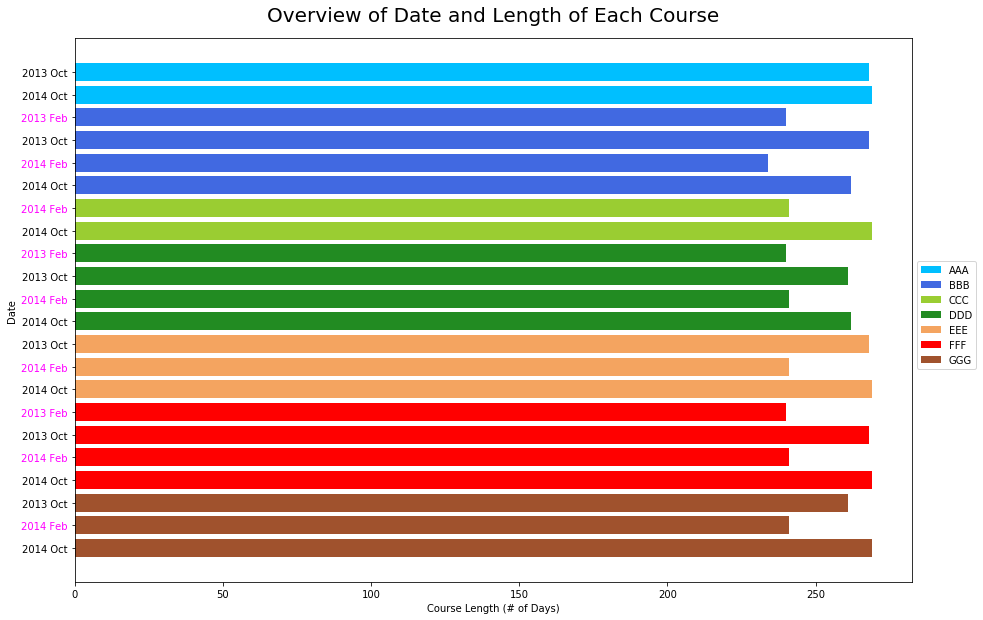

In [6]:
# sort first by code_module, secondly by year, thirdly by term
courses_sorted = courses.sort_values(by = ["code_module", "presentation_year", "presentation_term"]
                                    ).reset_index(drop = True)

# visualize the results

# define y-coordinates
y_cor = np.linspace(1, 22, 22)

# define the seven groups to be plotted
aaa_plot = courses_sorted.loc[:1, "module_presentation_length"]
aaa_y_cor = y_cor[:2]
aaa_ticklabels = ["2013 Oct", "2014 Oct"]

bbb_plot = courses_sorted.loc[2:5, "module_presentation_length"]
bbb_y_cor = y_cor[2:6]
bbb_ticklabels = ["2013 Feb", "2013 Oct", "2014 Feb", "2014 Oct"]

ccc_plot = courses_sorted.loc[6:7, "module_presentation_length"]
ccc_y_cor = y_cor[6:8]
ccc_ticklabels = ["2014 Feb", "2014 Oct"]

ddd_plot = courses_sorted.loc[8:11, "module_presentation_length"]
ddd_y_cor = y_cor[8:12]
ddd_ticklabels = ["2013 Feb", "2013 Oct", "2014 Feb", "2014 Oct"]

eee_plot = courses_sorted.loc[12:14, "module_presentation_length"]
eee_y_cor = y_cor[12:15]
eee_ticklabels = ["2013 Oct", "2014 Feb", "2014 Oct"]

fff_plot = courses_sorted.loc[15:18, "module_presentation_length"]
fff_y_cor = y_cor[15:19]
fff_ticklabels = ["2013 Feb", "2013 Oct", "2014 Feb", "2014 Oct"]

ggg_plot = courses_sorted.loc[19:, "module_presentation_length"]
ggg_y_cor = y_cor[19:]
ggg_ticklabels = ["2013 Oct", "2014 Feb", "2014 Oct"]

# individual color palette
colors = ["deepskyblue", "royalblue", "yellowgreen", "forestgreen", "sandybrown", "red", "sienna"]

# plot all seven sections
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10))

ax.barh(aaa_y_cor, aaa_plot, color = colors[0], label = "AAA")
ax.barh(bbb_y_cor, bbb_plot, color = colors[1], label = "BBB")
ax.barh(ccc_y_cor, ccc_plot, color = colors[2], label = "CCC")
ax.barh(ddd_y_cor, ddd_plot, color = colors[3], label = "DDD")
ax.barh(eee_y_cor, eee_plot, color = colors[4], label = "EEE")
ax.barh(fff_y_cor, fff_plot, color = colors[5], label = "FFF")
ax.barh(ggg_y_cor, ggg_plot, color = colors[6], label = "GGG")

ax.set_title("Overview of Date and Length of Each Course", size = 20, y = 1.02)
ax.set_xlabel("Course Length (# of Days)")
ax.set_ylabel("Date")
plt.legend(bbox_to_anchor = (1, 0.6))

# get list of all yticklabels
label_list = [aaa_ticklabels, bbb_ticklabels, ccc_ticklabels, ddd_ticklabels,
              eee_ticklabels, fff_ticklabels, ggg_ticklabels]

# flatten the list of lists to get single yticklabels
yticklabels = [yticklabel for code_list in label_list for yticklabel in code_list]

ax.set_yticks(y_cor)
ax.set_yticklabels(yticklabels)

# highlight courses starting in February as they are usually shorter
# get list of course indices starting in February
feb_starting = [2, 4, 6, 8, 10, 13, 15, 17, 20]

# highlight them, can't use list of indices, so we need to iterate through feb_starting list
for starting_idx in feb_starting:
    ax.get_yticklabels()[starting_idx].set_color(color = "magenta")

plt.gca().invert_yaxis()
plt.show()

We can see here much more intuitively that courses starting in February are, indeed, always shorter than courses starting in October. In fact, even the longest February-starting course is shorter than the shortest October-starting course. Thus, it really makes sense to adhere to the proposed good-practices hint of Open University to separetely analyse `B` and `J` terms. The following violin plot highlights again the difference between February- and October-starting courses.

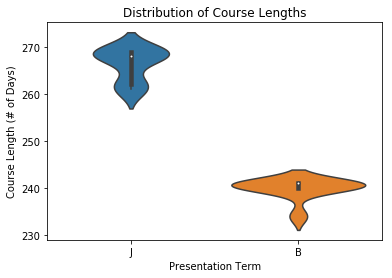

In [7]:
# create violin plot
sns.violinplot(x = courses_sorted["presentation_term"], y = courses_sorted["module_presentation_length"])
plt.title("Distribution of Course Lengths")
plt.xlabel("Presentation Term")
plt.ylabel("Course Length (# of Days)")
plt.show()

___
### Assessments Set
The assessments file contains information about all forms of assessment that took place during the presentation of a module. The file contains these variables:
* `code_module` --> identifies the presented course
* `code_presentation` --> when the module was presented
* `id_assessment` --> number to uniquely identify an assessment
* `assessment_type` --> describes which type of assessment was used; three types exist:
    * `TMA` --> tutor marked exam
    * `CMA` --> computer marked exam
    * `Exam` --> final exam
* `date` --> counts the days since the module went online until the assessment took place
* `weight` --> marks the weight of the respective exam; usually all exams combined constitute 100%, the final exam is usually weighted separetely with 100% on its own.

In [8]:
assessments = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/assessments.csv")
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Both paper and homepage note that if the date of the final exam is missing, it took place during the last week of presentations. We will check this in the following steps and complete the data with a derived date. As it is not clear on which day during the last week the exam took place, as well as it is not clear how long the module stayed online after the exam finished (only "a few" or "a couple" of weeks are mentioned in the paper, as well as it's not clear how to differentiate between before-presentation and after-presentation time on the pictured time scale above), I will pick a number that fits into the `module_presentation_length`. The already provided dates will serve as a reference frame, but we need to consider that the missing values are specifically in the last week of the the module being online.

In [9]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


We can see here that `date` has 11 `NaN` values, and all other values are non-empty.

Furthermore:
* `code_module`, `code_presentation` and `assessment_type` are object-encoded, i.e. strings
    * `code_presentation` for analysis purposes will be replaced again by `presentation_year` and `presentation_term`, both of which will also be object encoded again
* `id_assessment` is integer encoded and will stay that way for easier data handling (same as `presentation_year`)
* `date` is currently a floating point number but will be changed to integer (after `NaN`s are filled) as there will only be full days
* `weight` is also a floating point number but will stay that way as there could be calculations where floats a necessary

Let's see what other dates were used for the final exam

In [10]:
# display data filtered for final exams
assessments.loc[assessments["assessment_type"] == "Exam", :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


What we can observe here:
* 11 of the 24 final exams have no final exam date (module `CCC` has two exam dates for each term)
* Sometimes, all dates from a specific module are missing, sometimes we have reference values like for `DDD`

Let's separate year and term here aswell and then visualize the dates we have at hand to get a better impression of reference values

In [11]:
# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in assessments["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presetation_year
assessments["presentation_year"] = presentation_year
assessments = assessments.astype({"presentation_year": int}) # change string to int

# add new column with term
assessments["presentation_term"] = presentation_term

# get first 5 rows
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
0,AAA,2013J,1752,TMA,19.0,10.0,2013,J
1,AAA,2013J,1753,TMA,54.0,20.0,2013,J
2,AAA,2013J,1754,TMA,117.0,20.0,2013,J
3,AAA,2013J,1755,TMA,166.0,20.0,2013,J
4,AAA,2013J,1756,TMA,215.0,30.0,2013,J


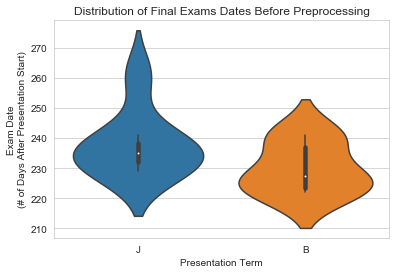

In [12]:
# visualize final exams dates in violin plots with regards to presentation terms

# filter the DataFrame to only include final exams
exams = assessments.loc[assessments["assessment_type"] == "Exam", :].copy()

# create violin plots
sns.set_style("whitegrid") # increases readability
sns.violinplot(x = exams["presentation_term"], y = exams["date"])
plt.title("Distribution of Final Exams Dates Before Preprocessing")
plt.xlabel("Presentation Term")
plt.ylabel("Exam Date\n(# of Days After Presentation Start)")
plt.show()

We can see from this that some final exams are relatively early considering that the `J` term is around one month longer than the `B` term.

The largest density (most courses) for October-starting courses is around 235 days after the presentation started. For February-starting courses, this number is around 225 days.

However, this data is not very reliable as we are only plotting 13 exam dates in total, so every single course considerably changes the density and thus its interpretability.

As a consequence, I will decide on a case-by-case basis what values I'll fill in.

In [13]:
# look at DDD first as there are 3 given exams dates
exams.loc[exams["code_module"] == "DDD", :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
87,DDD,2013B,25340,Exam,240.0,100.0,2013,B
94,DDD,2013J,25354,Exam,261.0,100.0,2013,J
101,DDD,2014B,25361,Exam,241.0,100.0,2014,B
108,DDD,2014J,25368,Exam,NaN,100.0,2014,J


Here, the second `J` term is missing. I will complete the missing value with the exam date of the previous year, i.e. 261 days, which would set the exam a day before the module went offline.

In [14]:
# fill in the value
assessments.loc[108, "date"] = 261 # general file
exams.loc[108, "date"] = 261 # specific file

The rest of missing final exams dates are missing for all modules, so there is no comparison to previous years or terms. Hence, I will spread out the exam dates arbitrarily in a 7 day time frame before the modules went offline. The reference value for the just completed 2014 missing exam date for `DDD` in 2013 was on the last day (261 of 261 days) of the course being online, so it is realistic to assume that exams can be up to the last day of a module being online.

I am especially deciding against a mean value for certain time frames based on other modules. We have no information that indicates whether all October- or February-starting courses start on the same day or in the same week, i.e. we don't know whether schedules are standardized. Therefore, I find it implausible to base exam dates around lengths after day 0 of other modules when, for example, they could have completely different schedules. On the contrary, I find it more plausible - together with the information that exams are held in the last week - to pick dates in a 7-day period around the given maximum length of a module being online.

In [15]:
# use double boolean indexing to find final exams for courses starting in February 2013
exams.loc[(exams["presentation_term"] == "B") & (exams["presentation_year"] == 2013), :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
23,BBB,2013B,14990,Exam,NaN,100.0,2013,B
87,DDD,2013B,25340,Exam,240.0,100.0,2013,B
136,FFF,2013B,34872,Exam,222.0,100.0,2013,B


`BBB` in February 2013 was online for 240 days, so I'll complete that missing value with an exam being 3 days before its end.

In [16]:
# fill in 237
assessments.loc[23, "date"] = 237 # general file
exams.loc[23, "date"] = 237 # specific file

In [17]:
# use double boolean indexing to find final exams for courses starting in October 2013
exams.loc[(exams["presentation_term"] == "J") & (exams["presentation_year"] == 2013), :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
5,AAA,2013J,1757,Exam,NaN,100.0,2013,J
35,BBB,2013J,15002,Exam,NaN,100.0,2013,J
94,DDD,2013J,25354,Exam,261.0,100.0,2013,J
113,EEE,2013J,30713,Exam,235.0,100.0,2013,J
149,FFF,2013J,34885,Exam,236.0,100.0,2013,J
185,GGG,2013J,37424,Exam,229.0,100.0,2013,J


The October 2013 `AAA` and `BBB` courses had a length of 268 days. Both exam dates will be filled in as being 2 days before the course was taken offline.

In [18]:
# fill in values
assessments.loc[[5, 35], "date"] = 266 # general file
exams.loc[[5, 35], "date"] = 266 # specific file

In [19]:
# use double boolean indexing to find final exams for courses starting in February 2014
exams.loc[(exams["presentation_term"] == "B") & (exams["presentation_year"] == 2014), :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
47,BBB,2014B,15014,Exam,NaN,100.0,2014,B
62,CCC,2014B,24290,Exam,NaN,100.0,2014,B
63,CCC,2014B,40087,Exam,NaN,100.0,2014,B
101,DDD,2014B,25361,Exam,241.0,100.0,2014,B
118,EEE,2014B,30718,Exam,228.0,100.0,2014,B
162,FFF,2014B,34898,Exam,227.0,100.0,2014,B
195,GGG,2014B,37434,Exam,222.0,100.0,2014,B


The February 2014 `BBB` course was 234 long. For module `CCC`, it looks like there were 2 final exams in the `B` term. As there is no explanation given, I suspect that these could be different time slots on the same day due to possible overlaps with other finals in the examination period. `CCC` was 241 days long, so my derived values will be 5 days, respectively, before the end.

In [20]:
# fill in values
assessments.loc[47, "date"] = 229 # module BBB, general file
assessments.loc[[62, 63], "date"] = 236 # module CCC, general file
exams.loc[47, "date"] = 229 # module BBB, specific file
exams.loc[[62, 63], "date"] = 236 # module CCC, specific file

In [21]:
# use double boolean indexing to find final exams for courses starting in October 2014
exams.loc[(exams["presentation_term"] == "J") & (exams["presentation_year"] == 2014), :]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,presentation_year,presentation_term
11,AAA,2014J,1763,Exam,NaN,100.0,2014,J
53,BBB,2014J,15025,Exam,NaN,100.0,2014,J
72,CCC,2014J,24299,Exam,NaN,100.0,2014,J
73,CCC,2014J,40088,Exam,NaN,100.0,2014,J
108,DDD,2014J,25368,Exam,261.0,100.0,2014,J
123,EEE,2014J,30723,Exam,235.0,100.0,2014,J
175,FFF,2014J,34911,Exam,241.0,100.0,2014,J
205,GGG,2014J,37444,Exam,229.0,100.0,2014,J


`AAA` in the October 2014 term has a length of 269 days, `BBB` a 262 length, and then we have two `CCC` module exams again in this term. `CCC` also has a length of 269 days. Here, I will schedule the exams 4 days before the end.

In [22]:
# fill in values
assessments.loc[[11, 72, 73], "date"] = 265 # modules AAA and CCC, general file
assessments.loc[53, "date"] = 258 # module BBB, general file
exams.loc[[11, 72, 73], "date"] = 265 # modules AAA and CCC, specific file
exams.loc[53, "date"] = 258 # module BBB, specific file

Now that we have filled in all `NaN` values, we can have a look at the distribution again as we have now 24 data points to judge.

Additionally, we can now change the data format from strings to integers

In [23]:
# change data format in assessments and exams
assessments = assessments.astype({"date": int})
exams = exams.astype({"date": int})

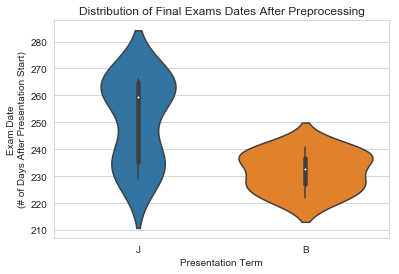

In [24]:
# visualize final exams dates in violin plots with regards to presentation term

# create violin plots
sns.set_style("whitegrid") # increases readability
sns.violinplot(x = exams["presentation_term"], y = exams["date"])
plt.title("Distribution of Final Exams Dates After Preprocessing")
plt.xlabel("Presentation Term")
plt.ylabel("Exam Date\n(# of Days After Presentation Start)")
plt.show()

Especially the October term has changed now. All the missing exam dates from the modules `AAA`, `BBB` and `CCC` in the October term were long terms with late exam dates. On the other hand, the `B`-term violin plot got denser around the day ranges between 225 and ~238 days. In general, there was a split between the missing and non-missing values. The non-missing values generally had earlier exam dates whereas the now filled in values were - as the university stated - in the last week. 

___
### Virtual Learning Environment Set
This file contains information about the available materials in the VLE. 

The columns are as follows:
* `id_site` --> identification number of the material
* `code_module` --> marks the course
* `code_presentation` --> in which term the presentation was held
* `activity_type` --> defines what kind of resource was used, e.g. `url`, `questionnaire`, or `externalquiz`
* `week_from` --> marks the week from which the material was planned to be used
* `week_to` --> marks the week until which the material was planned to be used

In [25]:
vle = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/vle.csv")
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [26]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site              6364 non-null int64
code_module          6364 non-null object
code_presentation    6364 non-null object
activity_type        6364 non-null object
week_from            1121 non-null float64
week_to              1121 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In this file, we have 6364 data points, however, we can immediately see that `week_from` and `week_to` are very sparsely filled. There is no further information given by the university, but it seems to me that  that `week_from` and `week_to` aren't chosen by students but by teachers instead. My initial impression was that I could use these data points to find out whether students who reach better grades were more apt to fill out this data request by the university (in the sense of more prone to do what they are supposed to do), but now it rather seems like this data should have been filled in by tutors and is simply incomplete. 

As there are 5/6 of data points missing, completing by use of means or most frequent values would strongly bias the data and change the meaning of the timeframes. Therefore, I could either fill out `NaN`s with `-1` and create a separate category that ML models can take up on. However, these two features aren't useful for the project task of predicting student success based on a given profile. If it is not clear beforehand whether the materials are available, it doesn't make sense to incorporate these features.

The current data types in this file are:
* `id_site` --> integer encoded
* `code_module` --> object encoded, i.e. strings
* `code_presentation` --> string, but will be changed for analysis reason into `presentation_year` (integer) and `presentation_term` (string)
* `activity_type` --> string
* `week_from` --> currently float, feature will be dropped
* `week_to` --> currently float, feature will be dropped

In [27]:
# drop week_from, week_to
vle.drop(labels = ["week_from", "week_to"], axis = 1, inplace = True)

# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in vle["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presentation_year
vle["presentation_year"] = presentation_year
vle = vle.astype({"presentation_year": int}) # change column to int

# add new column with term
vle["presentation_term"] = presentation_term

# first 5 rows
vle.head()

,id_site,code_module,code_presentation,activity_type,presentation_year,presentation_term
0,546943,AAA,2013J,resource,2013,J
1,546712,AAA,2013J,oucontent,2013,J
2,546998,AAA,2013J,resource,2013,J
3,546888,AAA,2013J,url,2013,J
4,547035,AAA,2013J,resource,2013,J


Let's get an overview of which resources were used, how often and at what time.

In [28]:
len(vle["id_site"].unique())

6364

It seems like there are 6364 unique materials used, and no material was used double in this data file. In order to get an overview of this data, I will show how many unique resources are in each of the activity types. This will provide an impression of how many resources are in what category and thus suggest an importance. Of course, there could also be only one resource in a category which is fundamentally for everthying else, but it nevertheless provides a sense of importance ranking when there are 100 or more resources in a category.

Additionally, I will provide an overview of how many resources are available for each of the seven courses. This will help us understand how time and work intensive a module can be and/or how many supporting resources have been made available for students.

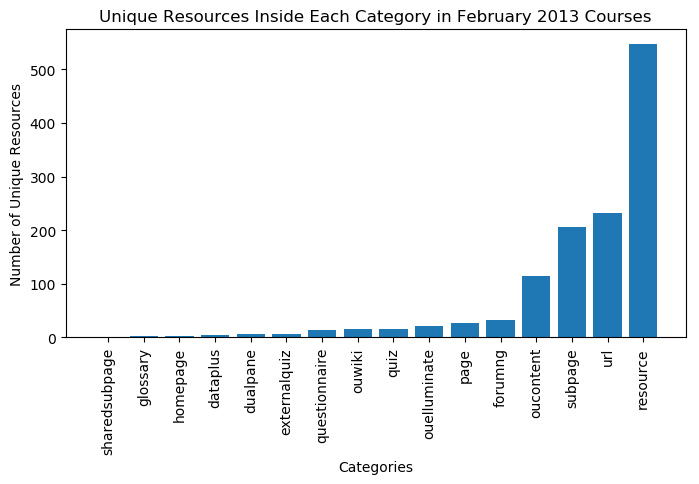

In [29]:
# slice for each term
feb_2013_activity = vle.loc[(vle["presentation_year"] == 2013) & (vle["presentation_term"] == "B"), :]
oct_2013_activity = vle.loc[(vle["presentation_year"] == 2013) & (vle["presentation_term"] == "J"), :]
feb_2014_activity = vle.loc[(vle["presentation_year"] == 2014) & (vle["presentation_term"] == "B"), :]
oct_2014_activity = vle.loc[(vle["presentation_year"] == 2014) & (vle["presentation_term"] == "J"), :]

# group each df by activity_type and filter for count of unique values
feb_2013_activity_grouped = feb_2013_activity.groupby(by = "activity_type").nunique()
oct_2013_activity_grouped = oct_2013_activity.groupby(by = "activity_type").nunique()
feb_2014_activity_grouped = feb_2014_activity.groupby(by = "activity_type").nunique()
oct_2014_activity_grouped = oct_2014_activity.groupby(by = "activity_type").nunique()

# sort all dfs by id_site
feb_2013_activity_grouped.sort_values(by = "id_site", inplace = True)
oct_2013_activity_grouped.sort_values(by = "id_site", inplace = True)
feb_2014_activity_grouped.sort_values(by = "id_site", inplace = True)
oct_2014_activity_grouped.sort_values(by = "id_site", inplace = True)

# visualize how many resources are in each of the activity groups
plt.style.use("default") # disable grid background for these plots
plt.figure(figsize = (8, 4))
plt.bar(x = np.arange(1, len(feb_2013_activity_grouped) + 1), height = 
                      feb_2013_activity_grouped["id_site"])
plt.xticks(np.linspace(1, 16, 16), labels = feb_2013_activity_grouped.index, rotation = 90)
plt.title("Unique Resources Inside Each Category in February 2013 Courses")
plt.xlabel("Categories")
plt.ylabel("Number of Unique Resources")
plt.show()

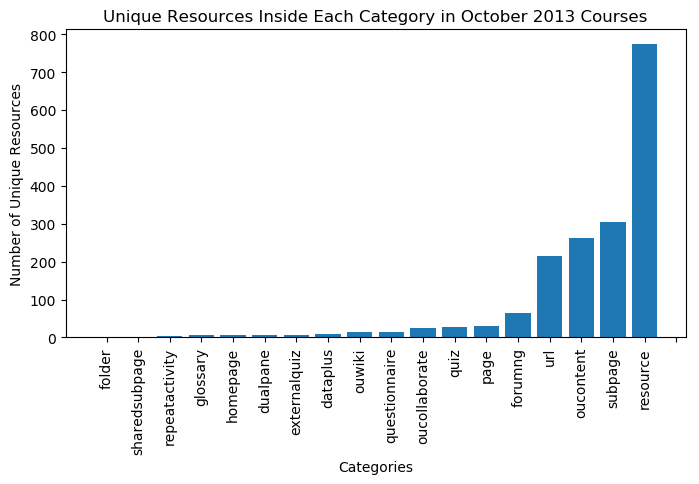

In [30]:
plt.figure(figsize = (8, 4))
plt.bar(x = np.arange(1, len(oct_2013_activity_grouped) + 1), height = 
                      oct_2013_activity_grouped["id_site"])
plt.xticks(np.linspace(1, len(oct_2013_activity_grouped) + 1,
                      len(oct_2013_activity_grouped) + 1),
           labels = oct_2013_activity_grouped.index, rotation = 90)
plt.title("Unique Resources Inside Each Category in October 2013 Courses")
plt.xlabel("Categories")
plt.ylabel("Number of Unique Resources")
plt.show()

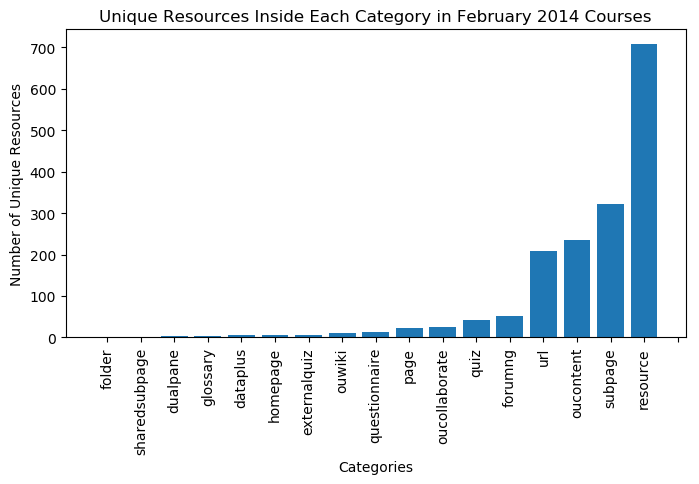

In [31]:
plt.figure(figsize = (8, 4))
plt.bar(x = np.arange(1, len(feb_2014_activity_grouped) + 1), height = 
                      feb_2014_activity_grouped["id_site"])
plt.xticks(np.linspace(1, len(feb_2014_activity_grouped) + 1,
                      len(feb_2014_activity_grouped) + 1),
           labels = feb_2014_activity_grouped.index, rotation = 90)
plt.title("Unique Resources Inside Each Category in February 2014 Courses")
plt.xlabel("Categories")
plt.ylabel("Number of Unique Resources")
plt.show()

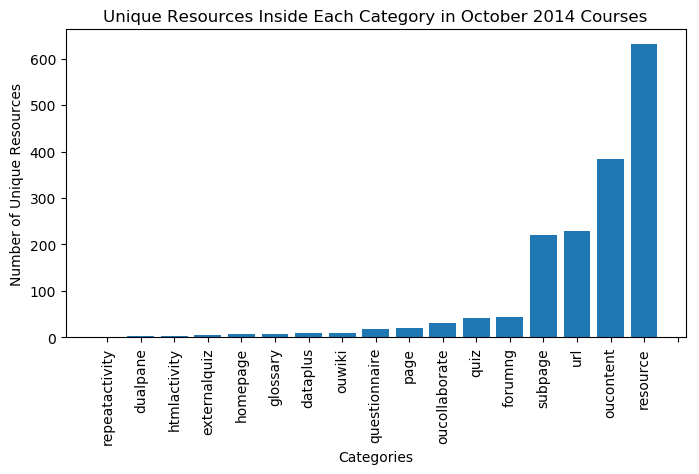

In [32]:
plt.figure(figsize = (8, 4))
plt.bar(x = np.arange(1, len(oct_2014_activity_grouped) + 1), height = 
                      oct_2014_activity_grouped["id_site"])
plt.xticks(np.linspace(1, len(oct_2014_activity_grouped) + 1,
                      len(oct_2014_activity_grouped) + 1),
           labels = oct_2014_activity_grouped.index, rotation = 90)
plt.title("Unique Resources Inside Each Category in October 2014 Courses")
plt.xlabel("Categories")
plt.ylabel("Number of Unique Resources")
plt.show()

Sadly, Open University doesn't provide insights into what exactly each category represents, but luckily most categories are more or less self-explanatory.

There is definitely a pattern recognizable: `resource`, which could be a count of all sites of the lecture notes / scripts, is by far the most offered resource. In second, third and fourth place are, in alternating order, `oucontent` (`ou` as a prefix means Open University), `subpage` and `url`. `Oucontent` probably refers to content specifically created by the university, e.g. videos explaining concepts, `subpages` could be deeper dives into specific topics, and `url` could refer to links to content not created by Open University, e.g. youtube, medium posts, blogs etc. 

In general, this is what I expected. Quizzes, questionnaires, OUcollaborate are all offered features, but certainly far behind general resources like written remarks explaining the content itself. 

In [33]:
# groupby the data, this time for each of the 7 modules

# drop code_presentation first as it is not needed in this sub-set
vle_light = vle.copy() # work on copy
vle_light.drop("code_presentation", inplace = True, axis = 1)

# slice for each module
aaa_activity = vle_light.loc[(vle["code_module"] == "AAA"), :]
bbb_activity = vle_light.loc[(vle["code_module"] == "BBB"), :]
ccc_activity = vle_light.loc[(vle["code_module"] == "CCC"), :]
ddd_activity = vle_light.loc[(vle["code_module"] == "DDD"), :]
eee_activity = vle_light.loc[(vle["code_module"] == "EEE"), :]
fff_activity = vle_light.loc[(vle["code_module"] == "FFF"), :]
ggg_activity = vle_light.loc[(vle["code_module"] == "GGG"), :]

# group each df by activity_type and filter for count of unique values
aaa_activity_grouped = aaa_activity.groupby("activity_type").nunique()
bbb_activity_grouped = bbb_activity.groupby("activity_type").nunique()
ccc_activity_grouped = ccc_activity.groupby("activity_type").nunique()
ddd_activity_grouped = ddd_activity.groupby("activity_type").nunique()
eee_activity_grouped = eee_activity.groupby("activity_type").nunique()
fff_activity_grouped = fff_activity.groupby("activity_type").nunique()
ggg_activity_grouped = ggg_activity.groupby("activity_type").nunique()

In [34]:
# all possible indices
idxs = [aaa_activity_grouped.index, bbb_activity_grouped.index, ccc_activity_grouped.index,
          ddd_activity_grouped.index, eee_activity_grouped.index, fff_activity_grouped.index,
          ggg_activity_grouped.index]

possible_idx = set([flat_idx for grouped_idx in idxs for flat_idx in grouped_idx]) # get unique values

# convert set back to list
possible_idx = list(possible_idx)

# get indices that are missing in each code_module
# i.e. get list of everything NOT IN each respective category
aaa_missing_idx = [a for a in possible_idx if a not in aaa_activity_grouped.index]
bbb_missing_idx = [b for b in possible_idx if b not in bbb_activity_grouped.index]
ccc_missing_idx = [c for c in possible_idx if c not in ccc_activity_grouped.index]
ddd_missing_idx = [d for d in possible_idx if d not in ddd_activity_grouped.index]
eee_missing_idx = [e for e in possible_idx if e not in eee_activity_grouped.index]
fff_missing_idx = [f for f in possible_idx if f not in fff_activity_grouped.index]
ggg_missing_idx = [g for g in possible_idx if g not in ggg_activity_grouped.index]

# create arrays with shape of new indices
aaa_zeros = np.zeros(shape = (len(aaa_missing_idx), 5)) # 5 columns, rows = length of missing indices
bbb_zeros = np.zeros(shape = (len(bbb_missing_idx), 5))
ccc_zeros = np.zeros(shape = (len(ccc_missing_idx), 5))
ddd_zeros = np.zeros(shape = (len(ddd_missing_idx), 5))
eee_zeros = np.zeros(shape = (len(eee_missing_idx), 5))
fff_zeros = np.zeros(shape = (len(fff_missing_idx), 5))
ggg_zeros = np.zeros(shape = (len(ggg_missing_idx), 5))

# create dataframes to append the values to our grouped dfs
aaa_activity_grouped = aaa_activity_grouped.append(pd.DataFrame(aaa_zeros, index = aaa_missing_idx,
                                                               columns = aaa_activity_grouped.columns))
bbb_activity_grouped = bbb_activity_grouped.append(pd.DataFrame(bbb_zeros, index = bbb_missing_idx,
                                                               columns = bbb_activity_grouped.columns))
ccc_activity_grouped = ccc_activity_grouped.append(pd.DataFrame(ccc_zeros, index = ccc_missing_idx,
                                                               columns = ccc_activity_grouped.columns))
ddd_activity_grouped = ddd_activity_grouped.append(pd.DataFrame(ddd_zeros, index = ddd_missing_idx,
                                                               columns = ddd_activity_grouped.columns))
eee_activity_grouped = eee_activity_grouped.append(pd.DataFrame(eee_zeros, index = eee_missing_idx,
                                                               columns = eee_activity_grouped.columns))
fff_activity_grouped = fff_activity_grouped.append(pd.DataFrame(fff_zeros, index = fff_missing_idx,
                                                               columns = fff_activity_grouped.columns))
ggg_activity_grouped = ggg_activity_grouped.append(pd.DataFrame(ggg_zeros, index = ggg_missing_idx,
                                                               columns = ggg_activity_grouped.columns))

# sort index alphabetically in order to create stacked bar charts with equal indices
aaa_activity_grouped.sort_index(inplace = True)
bbb_activity_grouped.sort_index(inplace = True)
ccc_activity_grouped.sort_index(inplace = True)
ddd_activity_grouped.sort_index(inplace = True)
eee_activity_grouped.sort_index(inplace = True)
fff_activity_grouped.sort_index(inplace = True)
ggg_activity_grouped.sort_index(inplace = True)

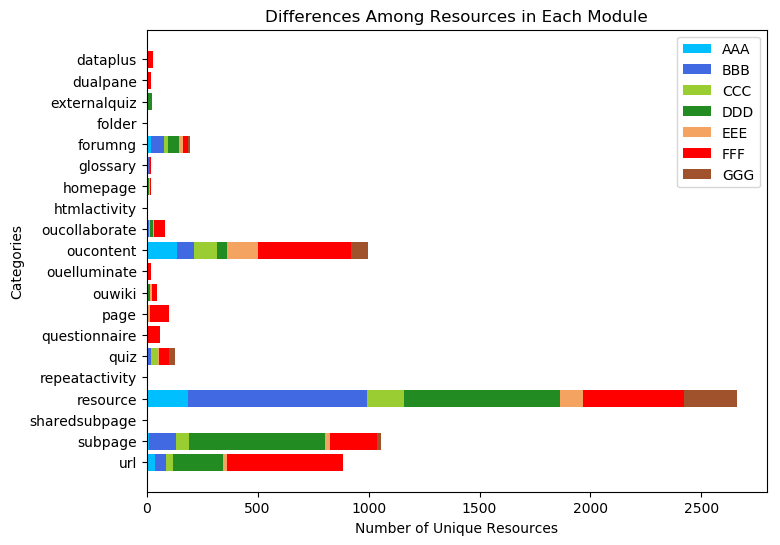

In [35]:
# create stacked barchart showing the differences among modules

# define y_cor
y_cor = np.linspace(1, 20, 20)

plt.figure(figsize = (8, 6))

# plot the data
plt.barh(y_cor, aaa_activity_grouped["id_site"], label = "AAA", color = colors[0])
plt.barh(y_cor, bbb_activity_grouped["id_site"], label = "BBB", color = colors[1],
        left = aaa_activity_grouped["id_site"])
plt.barh(y_cor, ccc_activity_grouped["id_site"], label = "CCC", color = colors[2],
        left = aaa_activity_grouped["id_site"] + bbb_activity_grouped["id_site"])
plt.barh(y_cor, ddd_activity_grouped["id_site"], label = "DDD", color = colors[3],
        left = aaa_activity_grouped["id_site"] + bbb_activity_grouped["id_site"] +
         ccc_activity_grouped["id_site"])
plt.barh(y_cor, eee_activity_grouped["id_site"], label = "EEE", color = colors[4],
        left = aaa_activity_grouped["id_site"] + bbb_activity_grouped["id_site"] +
         ccc_activity_grouped["id_site"] + ddd_activity_grouped["id_site"])
plt.barh(y_cor, fff_activity_grouped["id_site"], label = "FFF", color = colors[5],
        left = aaa_activity_grouped["id_site"] + bbb_activity_grouped["id_site"] +
         ccc_activity_grouped["id_site"] + ddd_activity_grouped["id_site"] +
         eee_activity_grouped["id_site"])
plt.barh(y_cor, ggg_activity_grouped["id_site"], label = "GGG", color = colors[6],
        left = aaa_activity_grouped["id_site"] + bbb_activity_grouped["id_site"] +
         ccc_activity_grouped["id_site"] + ddd_activity_grouped["id_site"] +
         eee_activity_grouped["id_site"] + fff_activity_grouped["id_site"])

plt.legend()
plt.title("Differences Among Resources in Each Module")
plt.xlabel("Number of Unique Resources")
plt.ylabel("Categories")
plt.gca().invert_yaxis()
plt.yticks(np.linspace(1, 20, 20), labels = aaa_activity_grouped.index)
plt.show()

In [36]:
# get total number of resources per module as supplementary info
vle.groupby(by = "code_module").nunique()["id_site"]

code_module
AAA     413
BBB    1154
CCC     419
DDD    1708
EEE     336
FFF    1967
GGG     367
Name: id_site, dtype: int64

We can see that module `FFF` has the most resources of all subjects, module `DDD` comes in close second place, and module `BBB` in third. Let's just remember: modules `AAA`, `BBB` and `GGG` are social science subjects, all other modules are STEM subjects. 

In general, STEM subjects offer more resources. Two of the three social sciences (`AAA` and `GGG`) have very little resources available in comparison to STEM subjects, but one of the STEM subjects, `EEE` has the fewest of all resources available. Nevertheless, there is a clear trend recognizable with STEM subjects providing more resources to students. 

___
### Student Info Set
This file contains information about the students' demographic data as well as their test results for each module.

The columns are as follows:
* `code_module` --> identifies the module
* `code_presentation` --> marks year and term
* `id_student` --> unique identification number for each student
* `gender` --> student's gender
* `region` --> the region in which the student resided while taking the course; options are regions in the UK
* `highest_education` --> the highest level of completed education when entering the course
* `imd_band` --> The [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index) is a measure of relative poverty often used in the UK. It is a weighted average of income, employment, education, health, crime, barriers to housing and services, and living environment.
* `age_band` --> range of age to which the student belongs; possible values are:
    * `0-35`
    * `35-55`
    * `55<=`
* `num_of_prev_attempts` --> the number of how many times the student tried to pass the module
* `studied_credits` --> how many module credits the student is studying for
* `disability` --> whether the student has disability status
* `final_result` --> the student's final result in the module; **this will be our categorical target variable**; possible values are: 
    * `Distinction`
    * `Pass`
    * `Withdrawn`
    * `Fail`

In [37]:
si = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentInfo.csv")
si.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [38]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


We can see in this file that we have 32,593 data points available. There are currently 1,111 `NaN`s in the `imd_band` column. There are no further notes on `NaN`s by the university, so I'll derive values for these regions from other regions who have values in them. My choice to derive values is to group the DataFrame by region and then take the median of the region's `imd_band`. The median is a more reliable value to fill missing values as it is less prone than the mean to be swayed by extreme values. Especially for following machine learning taks we want to avoid putting in biased data.

Furthermore, our variables are encoded as follows:
* `code_module` --> string
* `code_presentation` --> string, but will be replaced by `presentation_year` (int) and `presentation_term` (string)
* `id_student` --> int, will stay that way
* `gender` --> string
* `region` --> string
* `highest_education` --> string
* `imd_band` --> strings because there are not absolute numbers given but rather percentage ranges, e.g. `20-30%`
* `age_band` --> string due to `50<=`, will stay that way for now
* `num_of_prev_attempts` --> integer
* `studied_credits` --> integer
* `disability` --> string
* `final_result` --> string

Many columns like `gender`, `region`, `final_result` etc. will later be encoded as multi-class or multi-label with preprocessing tools like `OrdinalEncoder` or `OneHotEncoder`, so I won't go that far into encodings now.

In [39]:
# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in si["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presentation_year
si["presentation_year"] = presentation_year
si = si.astype({"presentation_year": int}) # change column to int

# add new column with term
si["presentation_term"] = presentation_term

# first 5 rows
si.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,presentation_year,presentation_term
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2013,J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2013,J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2013,J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2013,J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2013,J


As `imd_band` are strings, I'll need to find the median manually. This isn't 100% accurate as we can't take the average of two elements in an even element list, but it is extremely close. Taking the index of the element itself which usually would have been averaged with the following element will not bias the data in a ~32,000 indices list.

In [40]:
# get median of data
regions = si["region"].unique()

# create list to append median positions
median_pos = []

# define function to manually get the median
def str_median(col): # enter the col of sliced df
    return (len(col)-1) // 2 # len starts counting at 1, but we need index, so subtract 1 and integer divide

# iterate through each region
for region in regions:
    # slice df to display only one region
    sliced_region = si.loc[si["region"] == region, :]
    
    # get median position
    median_pos.append(str_median(sliced_region["region"]))
    
# sort the df by ascending percentage ranges to find median value
si_imd_sorted = si.sort_values(by = ["imd_band"], na_position = "last")

# now we have df sorted by imd_band with "0-10%" at the beginning, and then ascending till NaN at the end
# get median values of all regions
median_val = []

# iterate through each region
for region, pos in zip(regions, median_pos):
    # use sorted df this time
    sliced_region = si_imd_sorted.loc[si_imd_sorted["region"] == region, :]
    
    # get median value
    median_val.append(sliced_region.iloc[pos, 6]) # use positional slicing as we don't have indices


# fill in the respective missing values
for region, median in zip(regions, median_val):
    # slice for region and fill respective missing values
    si.loc[si["region"] == region] = si.loc[si["region"] == region, :].fillna({"imd_band": median})

# check for missing values
si.isnull().sum().sum() # no more missing values

0

Now we can get a visual impression of what data and distribution is presented here. First, let's get an overview of **gender, age, region, highest education, IMD, disability, previous attempts, and final results** distribution. While describing the demographics, I will only consider unique students, whereas when describing previous attempts and final results, I will use all data points as it makes sense to include students who have passed/failed/withdrawn from multiple modules.

I used the following abbreviations for the highest education labels:
* Higher Ed -->  Higher Education Qualification 
* A-Level --> A Level or Equivalent
* Below A --> Lower Than A Level
* Post Grad --> Post Graduate Qualification
* No Deg --> No Formal Qualification

In [41]:
# individual color palette
colors = ["deepskyblue", "royalblue", "yellowgreen", "forestgreen", "sandybrown", "red", "sienna"]

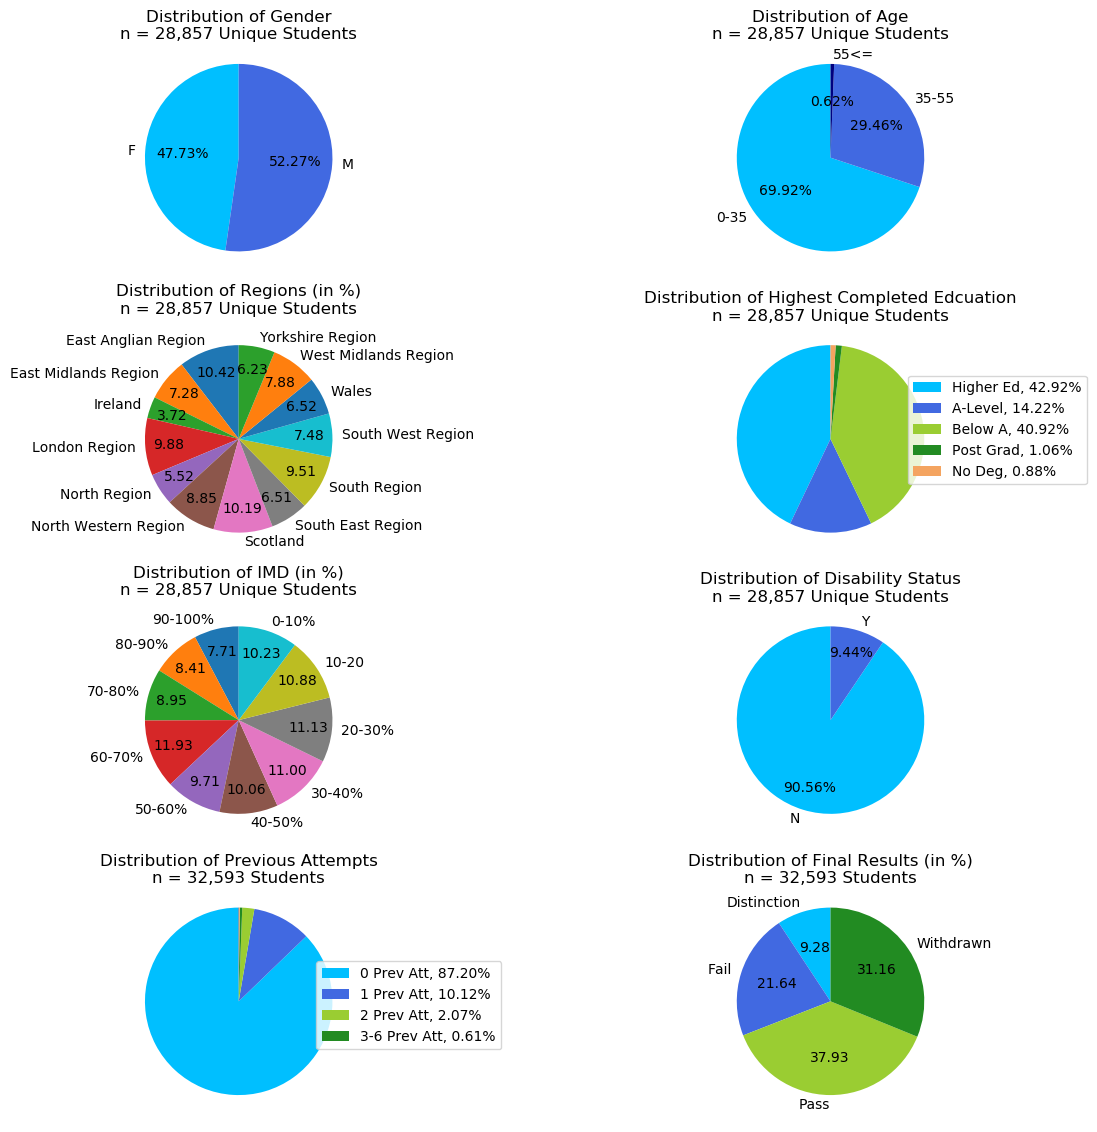

In [42]:
# create 8 subplots
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 14))

# == GENDER VALUES ==
# get gender values in variable
gender_dist = si.groupby(by = "gender").nunique()["id_student"]

# pie chart of gender distribution
axs[0, 0].pie(x = gender_dist, labels = gender_dist.index, startangle = 90,
       colors = colors[:2], autopct = "%.2f%%")
axs[0, 0].set_title("Distribution of Gender\nn = 28,857 Unique Students", y = 0.97)

# == AGE VALUES ==
# get age values in variable
age_dist = si.groupby(by = "age_band").nunique()["id_student"]

# pie chart of age distribution
axs[0, 1].pie(x = age_dist, labels = age_dist.index,
              colors = ["deepskyblue", "royalblue", "navy"], autopct = "%.2f%%", startangle = 90)
axs[0, 1].set_title("Distribution of Age\nn = 28,857 Unique Students", y = 0.97)

# == REGION VALUES ==
# get region values in variable
region_dist = si.groupby(by = "region").nunique()["id_student"]

# pie chart of region values
axs[1, 0].pie(x = region_dist, labels = region_dist.index, startangle = 90, autopct = "%.2f",
             pctdistance = 0.75)
axs[1, 0].set_title("Distribution of Regions (in %)\nn = 28,857 Unique Students", y = 1)

# == HIGHEST EDUCATION ==
# get highest education in variable
edu_dist = si.groupby(by = "highest_education").nunique()["id_student"]

# create legend here as labels and numbers are overlapping otherwise
pie4_labels = ["Higher Ed", "A-Level", "Below A", "Post Grad", "No Deg"]
pie4_values = edu_dist / sum(edu_dist) * 100

# pie chart of highest education values
axs[1, 1].pie(x = edu_dist, colors = colors[:6], startangle = 90)
axs[1, 1].set_title("Distribution of Highest Completed Edcuation\nn = 28,857 Unique Students", y = 0.97)
axs[1, 1].legend(bbox_to_anchor = (0.8, 0.8),
                 # use unpacking operation together with list comprehension to generate legend
                 labels = ["%s, %1.2f%%" % (lbl, p) for lbl, p in zip(pie4_labels, pie4_values)])
                           
# == IMD VALUES ==
# get imd values in variable
imd_dist = si.groupby(by = "imd_band").nunique()["id_student"]
imd_dist = imd_dist.sort_index(ascending = False)

# pie chart of imd band values
axs[2, 0].pie(x = imd_dist, labels = imd_dist.index, startangle = 90,
             autopct = "%.2f", pctdistance = 0.75)
axs[2, 0].set_title("Distribution of IMD (in %)\nn = 28,857 Unique Students", y = 1)

# == DISABILITY VALUES ==
# get disability values in variable
disability_dist = si.groupby(by = "disability").nunique()["id_student"]

# pie chart of disability values
axs[2, 1].pie(x = disability_dist, colors = colors[:2], labels = disability_dist.index,
             autopct = "%.2f%%", startangle = 90, pctdistance = 0.75)
axs[2, 1].set_title("Distribution of Disability Status\nn = 28,857 Unique Students", y = 0.97)

# == PREVIOUS ATTEMPTS ==
# get previous attempts in a variable
attempts_dist = si.groupby(by = "num_of_prev_attempts").count()["id_student"]

# create legend here as labels and numbers are overlapping otherwise
pie7_labels = ["0 Prev Att", "1 Prev Att", "2 Prev Att", "3-6 Prev Att"]

# calculate values
values = attempts_dist / sum(attempts_dist) * 100
pie7_values = [values[0], values[1], values[2], sum(values[3:])]

# pie chart of previous attempts
axs[3, 0].pie(x = attempts_dist, colors = colors, startangle = 90)
axs[3, 0].legend(bbox_to_anchor = (0.8, 0.7),
                labels = ["%s, %1.2f%%" % (lbl, p) for lbl, p in zip(pie7_labels, pie7_values)])
axs[3, 0].set_title("Distribution of Previous Attempts\nn = 32,593 Students", y = 0.97)

# == FINAL RESULTS ==
# get final results in a variable
results_dist = si.groupby(by = "final_result").count()["id_student"]

# pie chart of final results
axs[3, 1].pie(x = results_dist, labels = results_dist.index, colors = colors[:5],
             autopct = "%.2f", startangle = 90)
axs[3, 1].set_title("Distribution of Final Results (in %)\nn = 32,593 Students", y = 0.97)

plt.show()

Our **student population** is pretty balanced with a female-to-male ratio of 48:52 percent. 

The **age distribution** shows that mostly (70%) people below the age of 35 are enrolled in these courses (again, note: this is *not representative* of the total population of students of Open University, but rather a handpicked sample), around 30% are between 35 and 55 years, and below 1% are 55 years or older.

The students come from 13 different **regions** in the UK. The regions are roughly equally distributed, with `Ireland` being the lowest outlier with 3.72%. The highest percentage present - although not being an outlier -  is the `East Anglian Region` with 10.42%. Most other regions are inside the 6%-10% range. Directly related to the regions is the **IMD range**, which mirrors the distribution of the regions. There are 10 possible value ranges between 0% and 100% IMD. Our distribution shows that the `90-100%` range is least represented with 7.71% of students, and most students (11.93%) are in the `60-70%` range. The distribution is therefore remarkably well diversified. _Important to note:_ the IMD band is not directly derived from one region and thus doesn't cover a whole region. On the contrary, every region can have poorer (low IMD) and wealthier (high IMD) areas. Therefore, we can't say that e.g. students form `West Midlands Region` are poorer than students from `Scotland`.

Out of all enrolled students' **completed higher education**, 42.92% have a higher education qualification, which probably relates to a Bachelor's degree (Open University doesn't state exactly what their terms mean). The second largest group, encompassing 40.92% of students, have a below A-level qualification, which can be compared to not having a Matura or Abitur or high school degree. Around 14% of students have completed their A-levels, roughly 1% already have a postgraduate qualification (i.e. completed Master's or equivalent), and below 1% do not have any formal qualifications. 

Ten percent of students have filed for **disability status**, and ~87% of modules (_not unique students_) have been passed without **previous attempts**. Around 10% of courses were passed after the second attempt, only 2% needed two previous tries, and below 1% of courses were passed after needing 4-7 tries.

Because these percentages are incredibly small for everything above 1 try, I will create and indicator variable which I will label `1` for every try greater than 0. This will help group the values as I think that values in the ranges of 0.61%, which already groups everything from 3-6 previous attempts, will only distort our model coefficients.

The distribution of **final results** show that around 47% of students passed the 7 modules, 9% thereof with distinction. Around 31% of students withdrew from the given modules before the final exam, which also seems like a really high rate to me. All in all, nearly 22% of enrolled students failed the courses, which seems rather low compared to the withdrawing rate. However, this is probably because students rather choose to withdraw when they notice that they are about to fail.

In [43]:
# change all attempts greater than 0 to 1 as indicator variable

# iterate through all indices of si set
for idx in si.index:
    # if prev attempts > 0, change them to 1
    if si.loc[idx, "num_of_prev_attempts"] > 0:
        si.loc[idx, "num_of_prev_attempts"] = 1
        
# show new distribution
si["num_of_prev_attempts"].value_counts() / si["num_of_prev_attempts"].value_counts().sum()

0    0.871997
1    0.128003
Name: num_of_prev_attempts, dtype: float64

In [44]:
# check general distribution of studied credits
si["studied_credits"].value_counts()[-5:]

255    1
345    1
585    1
315    1
655    1
Name: studied_credits, dtype: int64

`studied_credits` is currently very spread out as we can see: there are multiple categories with only one student in them. Hence, we have a similar problem as we had with `num_of_prev_attempts`. I will therefore create categories which I will structure around the general european credit transfer system (ECTS). The general study structure is that students fulfill 30 ECTS per semester, which results in 60 ECTS per year.

There will be 4 groups:
* One year or below, i.e. 60 or below credits will be denoted as: 0
* Between 1 and 2 years, i.e. 61 to 120 credits: 1
* Above 2 years, i.e. 121+ credits: 2

In [45]:
# categorize studied credits

# iterate through all indices of si set
for idx in si.index:
    
    # if credits <= 60, change it to 0
    if si.loc[idx, "studied_credits"] <= 60:
        si.loc[idx, "studied_credits"] = 0
    
    # if credits > 60 and credits <= 120, change to 1
    elif (si.loc[idx, "studied_credits"] > 60) and (si.loc[idx, "studied_credits"] <= 120):
        si.loc[idx, "studied_credits"] = 1
        
    # if credits > 120
    elif si.loc[idx, "studied_credits"] > 120:
        si.loc[idx, "studied_credits"] = 2
        
        
# show new distribution
si["studied_credits"].value_counts() / si["studied_credits"].value_counts().sum()

0    0.631056
1    0.299727
2    0.069217
Name: studied_credits, dtype: float64

___
### Student Registration Set
This file contains information about the date when a student registered or unregistered for a course. The columns are as follows:
* `code_module` --> identifies the module
* `code_presentation` --> marks the year and term when the presentation was held
* `id_student` --> uniquely identifies the student
* `date_registration` --> number of days relative to the start of presentation
    * negative numbers: student registered before presentation started
    * positive numbers: student registered after presentation started
* `date_unregistration` --> date of unregistration relative to presentation start of the course
    * students who completed the course have a blank field
    * students who unregistered are the ones with `Withdrawal` as `final_result` in the `si` file above

In [46]:
sr = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentRegistration.csv")
sr.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [47]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


We can see here that we have ~50 unexplained missing values in `date_registration` and about 22,000 missing values in `date_unregistration`, [meaning that they finished the module](https://www.nature.com/articles/sdata2017171#Sec7) (see at section `Table studentRegistration`) - successful or unsuccessful. `date_registration` will be filled with the median value of the column in order to not bias the data in any way for coming machine learning tasks. 

The date of registration can be interpreted with other variables to find out whether a student might be very determined or interested in a subject based on a very early registration. In that sense, it can make a difference whether he registered 150 days in advance or 20 days in advance. On the other hand, a more desinterested student might only register a week after the course had already started. Nevertheless, this might be too much interpretation regarding a 150 days in advance registration being "better" than a 7 days in advance registration. For informational purposes, I will first provide an overview of the registration pattern, but will then change both columns into a categorical feature:
* registered more than or equal to 150 days in advance: `-150`
* registered between 150 and 50 days in advance: `-50`
* registered later than 50 days in advance: `1`

In my opinion it makes sense to differentiate between these groups because it simplifies the room of interpretation. Registering more than 5 months in advance can be seen as being more determined. The timeframe between 150 and 50 days in advance is where I think most students who don't plan too much ahead will decide for a course. This might still not be indicative of performance, but I think it is important to differentiate from the first group. In the next group, you most certainly won't find students who are very passionate about the subject because those would have registered earlier as they must have known what they want to study.

These columns will later be one-hot-encoded, so these number won't be interpreted in an ordinal, "better" or "worse" way. 

`date_unregistration` on the other hand doesn't provide any informational value for our classification task, or said differently: It directly spoils the a class of the final result. If a student has a date in `date_unregistration`, it means that he automatically has `Withdrawn` as the final result - just logically speaking, as there is no other possibility. If he finished the course, however, the feature also doesn't provide any logical indication as to what the final result might be. In essence, we can't find any pattern contributing to classification with this feature other than one of the final results itself. Therefore, I will not use this feature. 

Furthermore, the columns are currently encoded as follows:
* `code_module` --> string
* `code_presentation` --> string, but column will be replaced by `presentation_year` (int) and `presentation_term` (string)
* `id_student` --> int
* `date_registration` and `date_unregistration` --> both currently floats, will be encoded as integers after initial scatter plot

In [48]:
# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in sr["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presentation_year
sr["presentation_year"] = presentation_year
sr = sr.astype({"presentation_year": int}) # change column to int

# add new column with term
sr["presentation_term"] = presentation_term

# get first 5 rows
sr.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,presentation_year,presentation_term
0,AAA,2013J,11391,-159.0,NaN,2013,J
1,AAA,2013J,28400,-53.0,NaN,2013,J
2,AAA,2013J,30268,-92.0,12.0,2013,J
3,AAA,2013J,31604,-52.0,NaN,2013,J
4,AAA,2013J,32885,-176.0,NaN,2013,J


In [49]:
# fill date_registration with median
sr.fillna({"date_registration": sr["date_registration"].median()}, inplace = True)

# drop date_unregistration
sr.drop(labels = "date_unregistration", axis = 1, inplace = True)

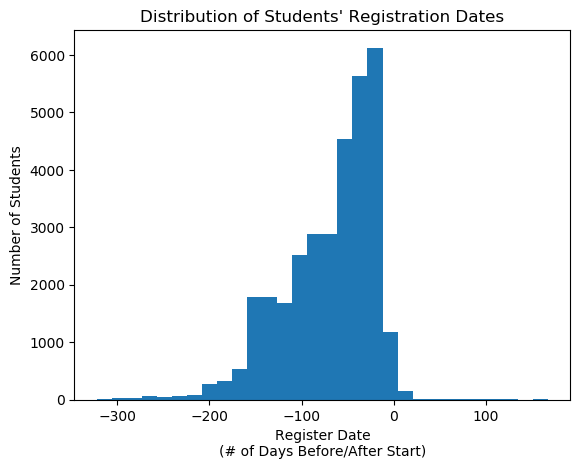

In [50]:
# get an overview of current registration and unregistration pattern

# scatter plot
plt.hist(x = sr["date_registration"], bins = 30)
plt.title("Distribution of Students' Registration Dates")
plt.xlabel("Register Date\n(# of Days Before/After Start)")
plt.ylabel("Number of Students")
plt.show()

As we can see, most of the registration are around 150 to ~50 days in advance of presentation start. Another group is around 50 to 30 days in advance. Very few registrations are after ~10 days after presentation start, therefore, the above defined groups cover the registration patterns very well.

Now that we got this overview, I'll change the columns to categorical variables:
* registered more than or equal to 150 days in advance: `-150`
* registered between 150 and 50 days in advance: `-50`
* registered later than 50 days in advance: `50`

In [51]:
# change date_registration to categorical column

# if values are <= -45, change to category -45
sr.loc[sr["date_registration"] <= -150, "date_registration"] = -150

# if values are between -45 and -14, change to category -30
sr.loc[(sr["date_registration"] > -150) & (sr["date_registration"] <= -50), "date_registration"] = -50

# if values are later than -30, change to category 1
sr.loc[sr["date_registration"] > -50, "date_registration"] = 50

# change columns to integer
sr.astype({
    "date_registration": int
}, inplace = True);

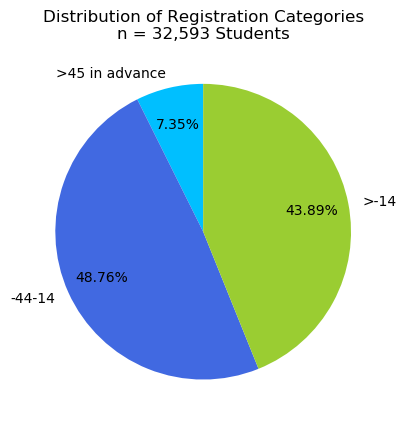

In [52]:
# visualize the newly formed categories

# get number of students (_not_ unique students) in each category into variable
reg_dist = sr.groupby(by = "date_registration").count()["id_student"] # registration categories

# pie charts of new registration distribution
plt.pie(x = reg_dist, startangle = 90, colors = colors[:5], autopct = "%.2f%%", pctdistance = 0.75,
       labels = [">45 in advance", "-44-14", ">-14"])
plt.title("Distribution of Registration Categories\nn = 32,593 Students", y = 1)
plt.show()

___
### Student Assessment Set
This dataset contains information regarding the students, their assessments and the combined scores. The columns are as follows:
* `id_assessment` --> a number that identifies the assessment
* `id_student` --> marks the student who took the assessment
* `date_submitted` --> the day when the assessment was submitted, relative to the number of days since the presentation started
* `is_banked` --> shows whether the assessment result has been deferred from a previous module and is credited now. [Explanation here.](https://help.open.ac.uk/documents/policies/assessment-banking-rules)
* `score` --> score of the respective assessment; 0 is lowest value, below 40 equals failing, max score is 100

Open University notes that if a student doesn't send in the assessment, no result will be recorded. The university notes aswell that results of the final exams are usually missing because the marks will be send directly to the calculation of the final result and not saved in the system.

In [53]:
sa = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentAssessment.csv")
sa.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [54]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


All features except `score` are already encoded as integer values. `score` is only encoded as a floating point number because currently there are null values in it. As all other scores are integer values, we will first deal with the `NaN`s and then encode the column as integer values, too.

From this we can aswell see that around 170 assessment scores are missing. Since all `date_submitted` values are provided, it seems that we have rather the case that all missing scores were scores of final exams. We can cross-check this with the `assessments` file.

In [55]:
# index the final exams
final_exam_id = set(assessments.loc[assessments["assessment_type"] == "Exam", "id_assessment"].unique())

# get the assessment ids of missing scores
score_missing = set(sa.loc[sa["score"].isnull(), "id_assessment"].unique())

# length of missing score ids
print("number of assessment ids with missing scores:", len(score_missing))

# check for overlapping ids
score_missing.intersection(final_exam_id)

number of assessment ids with missing scores: 78


set()

Based on [Figure 4](https://www.nature.com/articles/sdata2017171/figures/4) of the published paper, the `id_assessment` column of the `assessment` file feeds data into this `sa` (i.e. `studentsAssessment`) file. 
![](capstone-fig4-detailed-dataset-structure.png)
Figure 4: Detailed dataset structure

As we could just see above, the intersection of both sets was empty. In other words, there were no overlapping assessment ids, which consequently means that our missing scores are not due to them being final exams and the scores not being stored in the system, but rather because the assessments were not submitted by students. It doesn't make sense that they have a valid `date_submitted` entered unless the student's submission was empty or not valid due to other reasons. As I can't verify any of this and the university doesn't provide additional information on either the dataset's homepage or in the published paper, I decide to drop the 173 data points. Because we have close to 174,000 data points here, this won't impact our analysis too much. If it were a main part of our data, I would take the risky solution and change the submission date to the last day of each course and mark the score as 0. However, this may create logical inconsistencies with final scores, i.e. distinction, pass, fail or withdraw, so I'm rather going to exclude the 173 values.

In [56]:
# drop the NaN rows
sa.dropna(axis = 0, subset = ["score"], inplace = True)

# encode score column as int
sa = sa.astype({"score": int})

# check dataframe
sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173739 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173739 non-null int64
id_student        173739 non-null int64
date_submitted    173739 non-null int64
is_banked         173739 non-null int64
score             173739 non-null int64
dtypes: int64(5)
memory usage: 8.0 MB


To get a better feeling for the score results, e.g. GPA per assessment, as well as patterns regarding `date_submitted`, I'll calculate and visualize some statistics.

number of unique assessments: 188


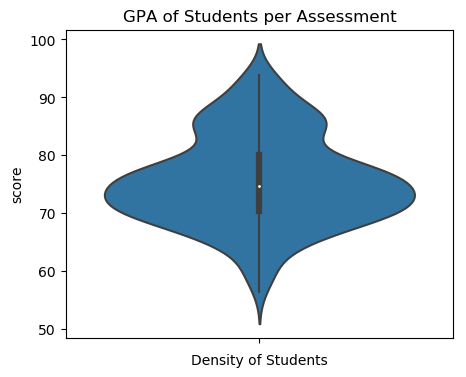

In [57]:
# GPA per assessment
print("number of unique assessments:", len(sa["id_assessment"].unique())) # 188

# group df by id_assessment, calculate average of grouped scores
sa_grouped = sa.groupby(by = "id_assessment").mean()["score"]

# plot the distribution
plt.figure(figsize = (5, 4))
sns.violinplot(y = sa_grouped)
plt.title("GPA of Students per Assessment")
plt.xlabel("Density of Students")
plt.show()

From this we can see that the GPAs per assessment are in the range of ~55 to ~95. There are assessments with poorer results in ranges of 55 to 65, however, there tend to be more successful scores in the ranges of 80 to 95 than in the poorer ranges. The bulk of GPAs is still in the upper-middle ranges of 70 to 80.

This visualization does not capture the range and distribution of each individual student's performance, so the following boxplot will provide that overview.

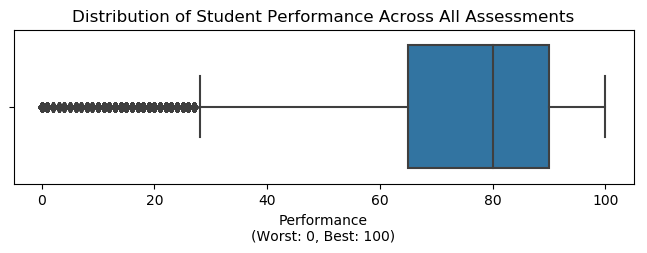

In [58]:
# box plot of general student performance
plt.figure(figsize = (8, 2))
sns.boxplot(x = sa["score"])
plt.title("Distribution of Student Performance Across All Assessments")
plt.xlabel("Performance\n(Worst: 0, Best: 100)")
plt.show()

With the given cutoff of failing when the score is below 40, we can see that a significant number of students fail an assessment. The boxplot is, however, definitely skewed onto the right side, which means that students generally perform in the higher performance ranges. In fact, the middle 50% of students are between ~65 and ~90, which mirror our observation of ~31% of students finishing with distinction (still not exactly defined). The top quartile also reach the 100 mark, which means that there really are high-performing students in the pool. The bottom quartile reaches from ~30 to ~65, which shows that lower performances are much more spread out, as well as that really poor performance are statistical outliers.

Additionally, for this file it is interesting to see whether there is a pattern to be recognized regarding the date of submission and the score.

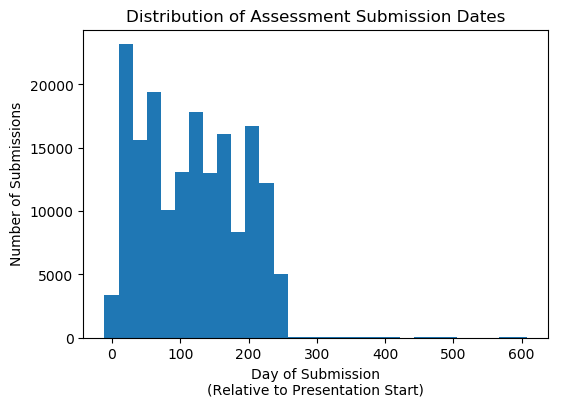

In [59]:
# get overview of date_submitted
plt.figure(figsize = (6, 4))
plt.hist(sa["date_submitted"], bins = 30)
plt.title("Distribution of Assessment Submission Dates")
plt.xlabel("Day of Submission\n(Relative to Presentation Start)")
plt.ylabel("Number of Submissions")
plt.show()

Open University mentioned that some scores can be credited from previous presentations, so some negative submission dates are realistic. In such cases, I imagine that the performance scores get manually entered by university administrators before the presentation starts. However, Open University never mentioned that scores can be added subsequently. Because of this, numbers in the ranges of 400-600 days are impossible. As I have no other information indicating that these numbers are correct, I will change the submission dates to the date of the exam in the `assessments` file as these files are linked via `id_assessment`. This shouldn't skew the data significantly.

Process:
* Get the last day of any assessment from the `assessment` file. All submissions after that day are very improbable to be correct
* Filter our `sa` file for dates after that upper limit day
* Iterate over all cases by `id_assessment` in the `assessment` file to get the day of that assessment
* Replace our improbable date with the day of that assessment

In [60]:
# get last date of any assessment
max_day = assessments["date"].max() # 266

# filter for all improbable dates, i.e. submission dates after 266 days
improbable_dates = sa.loc[sa["date_submitted"] > 266, ["date_submitted", "id_assessment"]] # 71 dates

# iterate over assessment file with id_assessment of improbable dates, get the believed correct dates
for day_idx, id_assess in zip(improbable_dates["date_submitted"].index, improbable_dates["id_assessment"]):
    # search for id_assessment in assessments df, get date column
    correct_day = assessments.loc[assessments["id_assessment"] == id_assess, "date"].values
    
    # change the day in sa df
    sa.loc[day_idx, "date_submitted"] = correct_day
    
# check new highest day value in date_submitted
sa["date_submitted"].max()

266

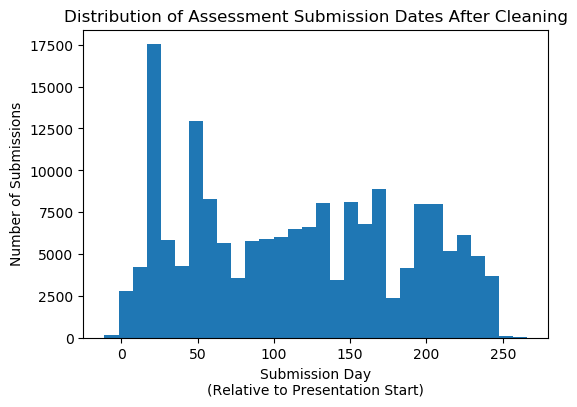

In [61]:
# get new histogram of submission date distribution
plt.figure(figsize = (6, 4))
plt.hist(sa["date_submitted"], bins = 30)
plt.title("Distribution of Assessment Submission Dates After Cleaning")
plt.xlabel("Submission Day\n(Relative to Presentation Start)")
plt.ylabel("Number of Submissions")
plt.show()

To get a better understanding of whether there is a trend between submission dates and scores, let's group the submission days into 18 bins in steps of 15. Then we have 18 categories with continuous data, so we can visualize the score trend of each category side by side. In ML tasks, I will still use the raw number of days. The column will not be one-hot-encoded, so that the numbers can be ordinally interpreted.

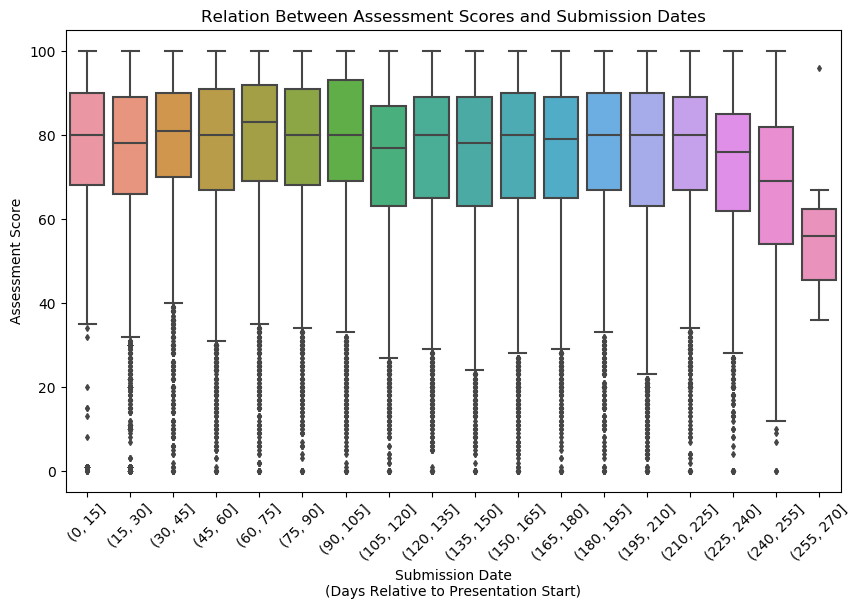

In [62]:
# assign a group to each date_submitted
sa["date_bins"] = pd.cut(sa["date_submitted"], bins = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165,
                                                      180, 195, 210, 225, 240, 255, 270])

# visualize the data
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))

ax = sns.boxplot(x = "date_bins", y = "score", data = sa, fliersize = 3, ax = ax)
ax.set_title("Relation Between Assessment Scores and Submission Dates")
ax.set_xlabel("Submission Date\n(Days Relative to Presentation Start)")
ax.set_ylabel("Assessment Score")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [63]:
# number of scores in last group
(sa["date_submitted"] > 255).sum()

7

The middle 50% body of values generally varies around the ranges of ~70 to ~90. The median is usually at ~80. Assessments submitted in the first 15 days of presentation tend to have fewer outliers in the below 40 range. Submissions after 105 days are marked by a slightly lower median varying rather around ~75.

A noticeable trend can be seen after the 225-days group. Submissions in the 225-240 days group have a lower median at around 70 with the middle 50% body only ranging to 85. The next group, 240-255 days, lowers the median to ~65 while the middle 50% body stops at ~82. The last group, 255-270 days, lowers the median to a test score of slightly below 60 whereas the upper whisker only reaches 64. It still has to be said that, excluding the last group, the upper whisker still reaches test scores of 100 every time. The last group is also skewed as there are only 7 values in it. Nevertheless, there is a trend observable that very late assessment submissions tend towards lower scores than earlier submitted exams.

In [64]:
# check how often assessment scores were banked
sa["is_banked"].value_counts() / sa["is_banked"].value_counts().sum()

0    0.989018
1    0.010982
Name: is_banked, dtype: float64

As this feature is very rarely used, we have to check the distribution among our target variable whether it is useful to incorporate in the model. Due to al the planned splitting among test and validation set, this feature might distort the classification results more than contribute to them.

___
### Student Virtual Learning Environment
This file contains information about the interactions of students with the virtual learning environment, e.g. clicking around in provided materials. The following columns are in this file:
* `code_module` --> identifies the course
* `code_presentation` --> marks the year and term
* `id_student` --> uniquely identifies each student
* `id_site` --> uniquely identifies each site inside the VLE
* `date` --> date of student interaction with material; number of days relative to presentation start
* `sum_click` --> counts the number of times the student clicked on respetive material on given day

There are 10,655,280 rows in this file, i.e. our largest file.

In [65]:
svle = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentVle.csv")
svle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [66]:
svle.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          10655280 non-null object
code_presentation    10655280 non-null object
id_student           10655280 non-null int64
id_site              10655280 non-null int64
date                 10655280 non-null int64
sum_click            10655280 non-null int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


As we can see, there are no missing values in this file.

The encodings are as follows:
* `code_module` --> string
* `code_presentation` --> string, but will be changed to `presentation_year` (int) and `presentation_term` (string)
* `id_student`, `id_site`, `date` and `sum_click` are all integers and will stay that way

In [67]:
# separate J and B from the year

# create lists to store both results
presentation_term = []
presentation_year = []

# iterate through code_presentation column
for term in svle["code_presentation"]:
    
    # append the term
    presentation_term.append(term[-1])
    
    # append the year without term to replace current column
    presentation_year.append(term[:-1]) # everything except last letter
    
    
# add presentation_year
svle["presentation_year"] = presentation_year
svle = svle.astype({"presentation_year": int}) # change column to int

# add new column with term
svle["presentation_term"] = presentation_term

# first five rows
svle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,presentation_year,presentation_term
0,AAA,2013J,28400,546652,-10,4,2013,J
1,AAA,2013J,28400,546652,-10,1,2013,J
2,AAA,2013J,28400,546652,-10,1,2013,J
3,AAA,2013J,28400,546614,-10,11,2013,J
4,AAA,2013J,28400,546714,-10,1,2013,J


Let's get an overview of this dataset by visualizing the clicks in relation to aspects like module, site, and date.

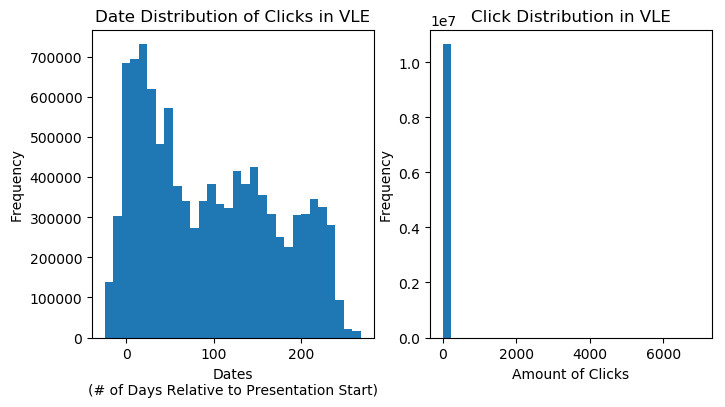

In [68]:
# get overview of date and clicks distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ax1.hist(svle["date"], bins = 30)
ax1.set_title("Date Distribution of Clicks in VLE")
ax1.set_xlabel("Dates\n(# of Days Relative to Presentation Start)")
ax1.set_ylabel("Frequency")

ax2.hist(svle["sum_click"], bins = 30)
ax2.set_title("Click Distribution in VLE")
ax2.set_xlabel("Amount of Clicks")
ax2.set_ylabel("Frequency")

plt.show()

In [69]:
(svle["sum_click"] > 200).sum()

1054

The first plot describes on which day relative to presentation start the students most frequently interact with - i.e. click around in - the course material in the VLE. The histogram shows that students tend to interact more often with the VLE in the first 50 days. In fact, students interact around two times (~650,000-700,000 interactions on a given day) as many times with the VLE in the first 50 days than at any time afterwards (~300,000-350,000). After day ~230, the interactions fall steeply to a level of ~100,000, and then after ~250 days to around 20,000 interactions. 

The histogram about the individual click distribution shows that almost all click-counts are below ~200 clicks, and only 1,054 click counts drag the graph up to about 7000. Initially I wanted to remove these values simply because they are only 1,054 out of 10.6 million, but this would remove a lot of informational depth of this feature. Furthermore, all of the svle-set features that go into the final matrix will be engineered, so these raw values won't find themselves in the input matrix. Nevertheless, as we will see in later distribution plots, the values are still skewed, so they will still be log-transformed.

To still get a better overview of the distribution, I will limit the x-range to still get a close loook at the main bulk of data.

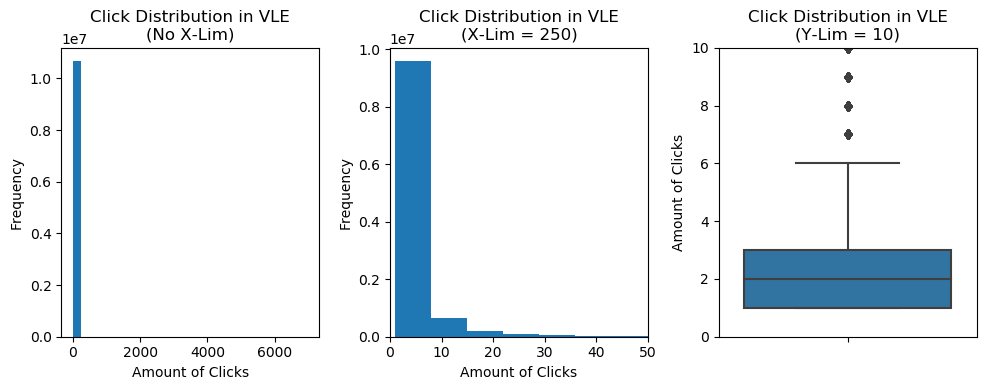

In [70]:
# get another histogram of sum_click
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

ax1.hist(svle["sum_click"], bins = 30)
ax1.set_title("Click Distribution in VLE\n(No X-Lim)")
ax1.set_xlabel("Amount of Clicks")
ax1.set_ylabel("Frequency")

ax2.hist(svle["sum_click"], bins = 1000)
ax2.set_xlim(left = 0, right = 50)
ax2.set_title("Click Distribution in VLE\n(X-Lim = 250)")
ax2.set_xlabel("Amount of Clicks")
ax2.set_ylabel("Frequency")

ax3 = sns.boxplot(y = svle["sum_click"], ax = ax3)
ax3.set_ylim(bottom = 0, top = 10)
ax3.set_title("Click Distribution in VLE\n(Y-Lim = 10)")
ax3.set_ylabel("Amount of Clicks")

plt.tight_layout()
plt.show()

The middle plot highlights that almost all of the 10.6 million click sums are below ~7, and that only really a very limited percentile of clicks is even above 10.

The boxplot on the right highlights this perfectly: outliers are already being statistically defined as such as early as 7, and the median of all click sums is 2. Sadly, this means that this variable provides less informational value than initially thought because there is little diversity in value. Nevertheless, this is a very deep and rich data pool, so we will still get representative results. 

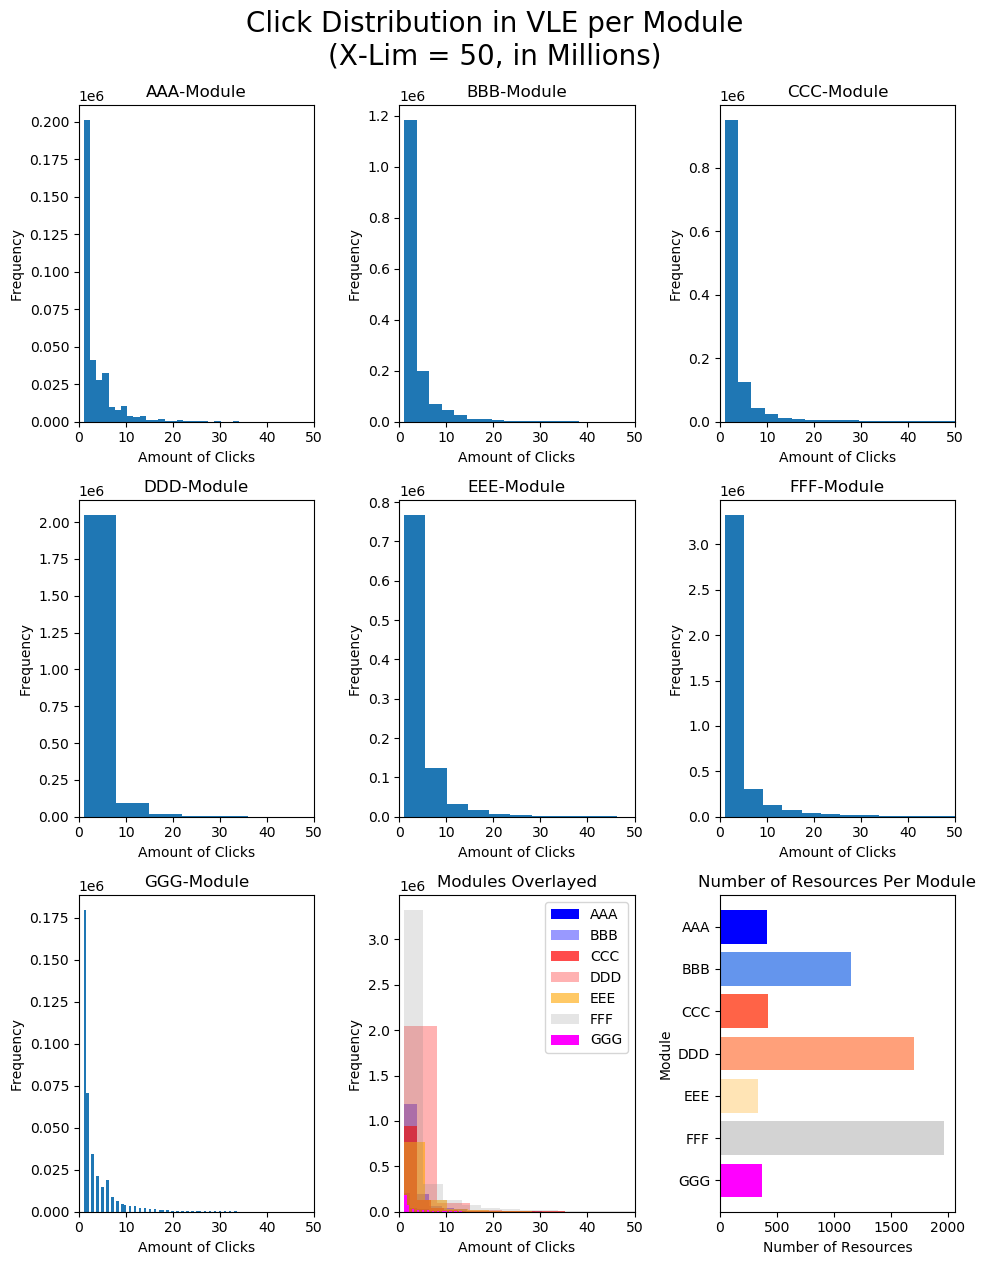

In [71]:
# slice the data to have 7 dfs, each with their respective click_sum

# slice for each module
aaa_clicks = svle.loc[(svle["code_module"] == "AAA"), "sum_click"]
bbb_clicks = svle.loc[(svle["code_module"] == "BBB"), "sum_click"]
ccc_clicks = svle.loc[(svle["code_module"] == "CCC"), "sum_click"]
ddd_clicks = svle.loc[(svle["code_module"] == "DDD"), "sum_click"]
eee_clicks = svle.loc[(svle["code_module"] == "EEE"), "sum_click"]
fff_clicks = svle.loc[(svle["code_module"] == "FFF"), "sum_click"]
ggg_clicks = svle.loc[(svle["code_module"] == "GGG"), "sum_click"]


# plot 7 histograms to check for significant differences among the modules
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 12))

# define title list
title_list = ["AAA-Module", "BBB-Module", "CCC-Module", "DDD-Module", "EEE-Module", "FFF-Module",
              "GGG-Module"]

click_list = [aaa_clicks, bbb_clicks, ccc_clicks, ddd_clicks, eee_clicks, fff_clicks, ggg_clicks]

for click_plot, ax, ttl in zip(click_list, axs.flat, title_list):
    ax.hist(click_plot, bins = 1000)
    ax.set_title(ttl)
    ax.set_xlim(left = 0, right = 50)
    ax.set_xlabel("Amount of Clicks")
    ax.set_ylabel("Frequency")
    ax.ticklabel_format(axis = "y", style = "sci", scilimits = (6, 6))
    
# delete last subplot
fig.delaxes(axs[2, 2])

# overlayed visualization in last subplot
plt.hist(aaa_clicks, label = "AAA", bins = 1000, alpha = 1, color = "blue")
plt.hist(bbb_clicks, label = "BBB", bins = 1000, alpha = 0.4, color = "blue")
plt.hist(ccc_clicks, label = "CCC", bins = 1000, alpha = 0.7, color = "red")
plt.hist(ddd_clicks, label = "DDD", bins = 1000, alpha = 0.3, color = "red")
plt.hist(eee_clicks, label = "EEE", bins = 1000, alpha = 0.6, color = "orange")
plt.hist(fff_clicks, label = "FFF", bins = 1000, alpha = 0.2, color = "gray")
plt.hist(ggg_clicks, label = "GGG", bins = 1000, alpha = 1, color = "magenta")

plt.title("Modules Overlayed")
plt.xlim(left = 0, right = 50)
plt.xlabel("Amount of Clicks")
plt.ylabel("Frequency")
plt.ticklabel_format(axis = "y", style = "sci", scilimits = (6, 6))
plt.legend(loc = "upper right")

# add subplot again to individually control that plot
fig.add_subplot(3, 3, 9) # 3x3 grid, 9th plot

plt.barh(y = np.linspace(1, 7, 7), width = vle.groupby(by = "code_module").nunique()["id_site"],
        color = ["blue", "cornflowerblue", "tomato", "lightsalmon",
                 "moccasin", "lightgrey", "magenta"]) # tried to mirror the overlayed color palette
plt.title("Number of Resources Per Module")
plt.xlabel("Number of Resources")
plt.ylabel("Module")
plt.gca().invert_yaxis()
plt.yticks(ticks = np.linspace(1, 7, 7), labels = ["AAA", "BBB", "CCC", "DDD", "EEE", "FFF", "GGG"])

plt.tight_layout() # avoid overlapping labels
fig.suptitle("Click Distribution in VLE per Module\n(X-Lim = 50, in Millions)", y = 1.05, size = 20)
plt.show()

On the first look, the distributions look very similar, however, we have to keep track of the y-labels. Then we can observe that there are huge differences among the clicks in each module. For example, `FFF` has by far the most clicks, followed by `DDD`. In comparison, modules `GGG` and `AAA` have almost no VLE interactions in comparison to all other courses. The overlayed plot presents well the differences among the modules with lots of clicks, but struggles to differentiate between the low-click courses like `AAA` and `GGG`. Nevertheless, we can can observe the dimensions among the various modules.

The clicks also correlate strongly with the provided resources in each module - as we have seen above. 

We were able to see that module `FFF` has the most resources of all subjects, module `DDD` came in close second place, and module `BBB` in third - just like our histgrams show here. Module `EEE` is an outlier in this trend as that module had the fewest resources available but is now in 5th place of most clicks.

As a note: modules `AAA`, `BBB` and `GGG` are social science subjects, all other modules are STEM subjects. This provides another starting point for following models.
___

### Merging Process
#### Feature Space Structure
It might seem intuitive that each row in the final feature space will represent the profile of a single student. However, our dataset here is not structured around unique students but rather around **unique observations** with students being a part of them. As just mentioned above, we have 32,593 students in our files, but even those are not unique students (as we saw during EDA, e.g. demographic data). Some students registered for multiple courses, thus multiplying the occurence of their `id_student`. For instance, in the following merging process we get to observe that one student, in one course, in one term, will submit up to 13 exams resulting in 13 unique assessment scores with respective weights.

To me, the options for merging were as follows:

1. Either, I will structure the dataset around unique students, which would, however, result in an enormous loss of data, especially depth and variety of available data. Here are again multiple options available: 

    1. Either, I'd have to one-hot-encode every single value in every single column, thus losing any ordinal value of e.g. test scores. In this scenario, the endresult would a matrix where every row is one unique student, and and `1` would mark e.g. that the student took assessment with `id = 17752` and a `score` of 77. By following this approach, the score value 77 would lose all meaning as it now only functions as a descriptive category, neglecting that 77 is a lower score than e.g. 99. Furthermore, the matrix would have several thousand columns, which would spread out the data too much to assign meaningful value towards any one column.

    1. The other option is to either only take one value per feature (e.g. one assignment score) and treat it as the only available data point, which would leave almost all of the data untouched, especially the click count later on for which we have 10.65 million data points available. The other option here would be to only take averages or medians of all data points where multiple values are available. In my opinion, this would result in nonsensical data if this were done across all features. 
   Example: A student writes 5 exams with 5 unique `id_assessment`s. Naturally, he gets 5 scores as a result. Averaging these 5 test scores might seem plausible, however, it is not clear to which assessment the average score should now belong. If this approach was done across all students, the regression algorithm later on will certainly misread a lot of patterns in the data, assigning scores to assessments which are factually incorrect and thus leading to questionable classification results.

2. The second option to me was to structure the dataset around **unique observations**, where each row holds the data of a unique combination of student demographics, meta data, test scores, and resources used. All unique identifier variables like `id_student` will come up multiple times, but each row will have a unique combination of descriptive features complementing those `id_xxx` variables. This approach seems much more reasonable to me because:
    1. It allows for keeping ordinal variables like `score` and counted VLE interactions, as well as meta data like dates to be in one column because we can now differentiate in rows among students sitting multiple assessments, thus letting the algorithm see the ranked nature of such features
    2. Furthermore, we can at the same time one-hot-encode categorical features, such as various resources used in the VLE, allowing the algorithm to also fully use categorical features
    3. We can use (almost) all of our available data without needing to use misleading averages or medians.
    > _Almost_ refers to the `svle` file with 10.65 million data points. To accomodate these values without multiple hours of model training time or instant kernel crashes on my laptop, I have to use aggregate forms of data of this file. Otherwise, the resulting merged DataFrame would be 132 million rows long. Nevertheless, this aggregate approach is still sensible and doesn't distort the data, it only slightly removes depth - as I'll discuss at that time in preprocessing.
    
Structuring the dataset like this allows us later on to make predictions based off hypothetical student profiles as discussed above. Another benefit here is that we have training data available for every single assessment, not only for the final exams. All in all, this approach allows for a much more complex and informed input space, resulting in more detailed predictions.

#### Feature Space Creation
Now we are going to start creating the feature space for our ML tasks by merging the seven separate files on certain keys. I will create 3 separate models for every ML model. This means that I will measure the accuracy of a combined model (`B` and `J` term at once), and one separate `B` term model, as well as one separate `J` term model. Because of this reason, the model merging process will be split up into several DataFrames as we can't split train and test set after having test data included in our preprocessing steps of the train data. This will result in several required splits because, for instance, we can only take the means of `B` terms in our separate `B` models.

As a consequence, I will re-load some the non-preprocessed files, split each of them as needed, and re-apply the appropriate preprocessing steps such filling null values, this time according to train-test best practices.

Throughout all models, I will use a 60-20-20 train-validation-test split. This allows us to have around 200,000 data points available in the combined model, and around 100,000 data points in each of the separate-term models, which is enough to have representative results without the need to use cross-validation.

#### Recap of what preprocessing I did in each file
* `courses`:
    * No significant preprocessing; we can use the already existing file from EDA
* `assessments`: 
    * Missing values in column `date` have been filled. This can also be done here withouth the need to consider train-test splits because `date` is based on arbitrary numbers in the last 7 days of `module_presentation_length`. There are no values that would change if I based the filling only on the train set as course lengths are equal in every set. We can use the already existing file from EDA
* `vle`:
    * `week_from` and `week_to` have been dropped. No effect on train and test split; we can use the existing file from EDA
* `si`:
    * Here I filled 1,111 NaN values based on the `imd_band` column's median. We must consider the train-test split in this case as we need to fill the NaNs in test set with the median of the training set column. Otherwise, data "leaked" from train to test set, thus the test data wouldn't be new anymore.
    * Because we have to split the DataFrames into 9 different combinations (train, val, test in a combined, b, j split), it is easier to map the `imd_band` values to integer values that mark the `imd_band` range. For this, I will map `0-10%` to `5%`, `10-20%` to `15%` and so on. This allows us to work with the groupby function to calculate medians per region instead of multiple for loops for every single DataFrame.
    * Created an indicator variable for every `num_of_prev_attempts` greater than 0
* `sr`:
    * `date_unregistration` has been dropped
    * `date_registration` had 50 NaN values which were filled with the median. Here we have to again consider the train-test split. Although the 50 values would probably not affect the outcome in a relevant way, as well as the fact that the values get grouped into categories later on, the correct procedure here is to first split the sets, get the train set median, and then input it into test sets.
    * categorize the feature after NaN filling
* `sa`: 
    * 173 NaN values dropped. No effect on train and test split; we can use the existing file from EDA
* `svle`:
    * No significant preprocessing; we can use the existing file from EDA
    
We will now start the merging process.

In [72]:
# read all files again / copy files that don't need additional/separate preprocessing; explanations below
courses_fs = courses.copy()
assessments_fs = assessments.copy()
vle_fs = vle.copy()
sa_fs = sa.copy()
svle_fs = svle.copy()
si_fs = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentInfo.csv")
sr_fs = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/OULA/studentRegistration.csv")

In [73]:
# add presentation_year and presentation_term to both files that need separate preprocessing

# create list of all files to be changed
file_list = [si_fs, sr_fs]

# create an index of the list with enumerate to work on dfs, not copies of dfs, iterate through dfs
for idx, file in enumerate(file_list): 

    # create lists to store both results
    presentation_term = []
    presentation_year = []

    # iterate through code_presentation column
    for term in file_list[idx]["code_presentation"]:
    
        # append the term
        presentation_term.append(term[-1])
    
        # append the year without term to replace current column
        presentation_year.append(term[:-1]) # everything except last letter

    # add presentation_year
    file_list[idx]["presentation_year"] = presentation_year

    # add new column with term
    file_list[idx]["presentation_term"] = presentation_term

In [74]:
# change dtype in DataFrames manually
si_fs = si_fs.astype({"presentation_year": int}) # change column to int
sr_fs = sr_fs.astype({"presentation_year": int})

In [75]:
from sklearn.model_selection import train_test_split

# start with si
# change all attempts greater than 0 to 1 as indicator variable

# iterate through all indices of si set
for idx in si_fs.index:
    # if prev attempts > 0, change them to 1
    if si_fs.loc[idx, "num_of_prev_attempts"] > 0:
        si_fs.loc[idx, "num_of_prev_attempts"] = 1
        

# categorize studied credits

# iterate through all indices of si set
for idx in si_fs.index:
    
    # if credits <= 60, change it to 0
    if si_fs.loc[idx, "studied_credits"] <= 60:
        si_fs.loc[idx, "studied_credits"] = 0
    
    # if credits > 60 and credits <= 120, change to 1
    elif (si_fs.loc[idx, "studied_credits"] > 60) and (si_fs.loc[idx, "studied_credits"] <= 120):
        si_fs.loc[idx, "studied_credits"] = 1
        
    # if credits > 120
    elif si_fs.loc[idx, "studied_credits"] > 120:
        si_fs.loc[idx, "studied_credits"] = 2
        

# create dictionary to map imd_band to integers marking each range
imd_dict = {
    "0-10%": 5,
    "10-20": 15, # Open University forgot the % sign here
    "20-30%": 25,
    "30-40%": 35,
    "40-50%": 45,
    "50-60%": 55,
    "60-70%": 65,
    "70-80%": 75,
    "80-90%": 85,
    "90-100%": 95
}

# map imd_band values inplace
si_fs["imd_band"] = si_fs["imd_band"].map(imd_dict)

In [76]:
# still 1,111 NaN values
si_fs.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
presentation_year          0
presentation_term          0
dtype: int64

In [77]:
# split si_fs into train and test set
tr_si_fs_org, te_si_fs_org = train_test_split(si_fs, test_size = 0.4, random_state = 0)

# split te_courses_fs again
val_si_fs_org, te_si_fs_org = train_test_split(te_si_fs_org, test_size = 0.5, random_state = 0)

# work on copies, otherwise warning is raised
tr_si_fs = tr_si_fs_org.copy()
val_si_fs = val_si_fs_org.copy()
te_si_fs = te_si_fs_org.copy()

# get shapes
print("train si shape:", tr_si_fs.shape)
print("val si shape:", val_si_fs.shape)
print("test si shape:", te_si_fs.shape)


# slice separate dfs for B and J term; si file

# B term
si_fs_b = si_fs.loc[si_fs["presentation_term"] == "B", :].copy()

# J term
si_fs_j = si_fs.loc[si_fs["presentation_term"] == "J", :].copy()

# get train and test split, B term
tr_si_fs_b_org, te_si_fs_b_org = train_test_split(si_fs_b, test_size = 0.4, random_state = 0)

# get val split, B term
val_si_fs_b_org, te_si_fs_b_org = train_test_split(te_si_fs_b_org, test_size = 0.5, random_state = 0)


# get train and test split, J term
tr_si_fs_j_org, te_si_fs_j_org = train_test_split(si_fs_j, test_size = 0.4, random_state = 0)

# get val split, J term
val_si_fs_j_org, te_si_fs_j_org = train_test_split(te_si_fs_j_org, test_size = 0.5, random_state = 0)

# work on copies, otherwise warning is raised
tr_si_fs_b = tr_si_fs_b_org.copy()
val_si_fs_b = val_si_fs_b_org.copy()
te_si_fs_b = te_si_fs_b_org.copy()

tr_si_fs_j = tr_si_fs_j_org.copy()
val_si_fs_j = val_si_fs_j_org.copy()
te_si_fs_j = te_si_fs_j_org.copy()

# get shapes
print("B train si shape:", tr_si_fs_b.shape)
print("B val si shape:", val_si_fs_b.shape)
print("B te si shape:", te_si_fs_b.shape)

print("J train si shape:", tr_si_fs_j.shape)
print("J val si shape:", val_si_fs_j.shape)
print("J test si shape:", val_si_fs_j.shape)

train si shape: (19555, 14)
val si shape: (6519, 14)
test si shape: (6519, 14)
B train si shape: (7492, 14)
B val si shape: (2498, 14)
B te si shape: (2498, 14)
J train si shape: (12063, 14)
J val si shape: (4021, 14)
J test si shape: (4021, 14)


We can now use the `.groupby()` function to get the median of every region. We will then fill the results of the groupby operation into the DataFrame.

In [78]:
# sort every df by imd_band, group train dfs by region and get median
tr_si_fs_imd = tr_si_fs.sort_values("imd_band").groupby("region").median()["imd_band"]
tr_si_fs_b_imd = tr_si_fs_b.sort_values("imd_band").groupby("region").median()["imd_band"]
tr_si_fs_j_imd = tr_si_fs.sort_values("imd_band").groupby("region").median()["imd_band"]

# fill in the values into each of the 9 dfs

# iterate through the grouped series indices to get region, values in series are median 
for region, median in zip(tr_si_fs_imd.index, tr_si_fs_imd):
    # slice for region and fill respective missing values, combined train set
    tr_si_fs.loc[tr_si_fs["region"] == region] = tr_si_fs.loc[
        tr_si_fs["region"] == region, :].fillna({"imd_band": median})
    
    # combined val set
    val_si_fs.loc[val_si_fs["region"] == region] = val_si_fs.loc[
        val_si_fs["region"] == region, :].fillna({"imd_band": median})
    
    # combined test set
    te_si_fs.loc[te_si_fs["region"] == region] = te_si_fs.loc[
        te_si_fs["region"] == region, :].fillna({"imd_band": median})
    
# B term set
for region, median in zip(tr_si_fs_b_imd.index, tr_si_fs_b_imd):
    # slice for region and fill respective missing values, B term train set
    tr_si_fs_b.loc[tr_si_fs_b["region"] == region] = tr_si_fs_b.loc[
        tr_si_fs_b["region"] == region, :].fillna({"imd_band": median})
    
    # B term, validation set
    val_si_fs_b.loc[val_si_fs_b["region"] == region] = val_si_fs_b.loc[
        val_si_fs_b["region"] == region, :].fillna({"imd_band": median})
    
    # B term, test set
    te_si_fs_b.loc[te_si_fs_b["region"] == region] = te_si_fs_b.loc[
        te_si_fs_b["region"] == region, :].fillna({"imd_band": median})
    
# J term set
for region, median in zip(tr_si_fs_j_imd.index, tr_si_fs_j_imd):
    # slice for region and fill respective missing values, J term train set
    tr_si_fs_j.loc[tr_si_fs_j["region"] == region] = tr_si_fs_j.loc[
        tr_si_fs_j["region"] == region, :].fillna({"imd_band": median})
    
    # J term, validation set
    val_si_fs_j.loc[val_si_fs_j["region"] == region] = val_si_fs_j.loc[
        val_si_fs_j["region"] == region, :].fillna({"imd_band": median})
    
    # J term, test set
    te_si_fs_j.loc[te_si_fs_j["region"] == region] = te_si_fs_j.loc[
        te_si_fs_j["region"] == region, :].fillna({"imd_band": median})

In [79]:
# sr file

# drop date unregistration
sr_fs.drop(labels = "date_unregistration", axis = 1, inplace = True)

# split sr_fs into train and test set
tr_sr_fs_org, te_sr_fs_org = train_test_split(sr_fs, test_size = 0.4, random_state = 0)

# split te_courses_fs again
val_sr_fs_org, te_sr_fs_org = train_test_split(te_sr_fs_org, test_size = 0.5, random_state = 0)

# work on copies, otherwise warning is raised
tr_sr_fs = tr_sr_fs_org.copy()
val_sr_fs = val_sr_fs_org.copy()
te_sr_fs = te_sr_fs_org.copy()

# get shapes
print("train courses shape:", tr_sr_fs.shape)
print("val courses shape:", val_sr_fs.shape)
print("test courses shape:", te_sr_fs.shape)

train courses shape: (19555, 6)
val courses shape: (6519, 6)
test courses shape: (6519, 6)


In [80]:
# slice separate dfs for B and J term; sr file

# B term
sr_fs_b = sr_fs.loc[sr_fs["presentation_term"] == "B", :].copy()

# J term
sr_fs_j = sr_fs.loc[sr_fs["presentation_term"] == "J", :].copy()

# get train and test split, B term
tr_sr_fs_b_org, te_sr_fs_b_org = train_test_split(sr_fs_b, test_size = 0.4, random_state = 0)

# get val split, B term
val_sr_fs_b_org, te_sr_fs_b_org = train_test_split(te_sr_fs_b_org, test_size = 0.5, random_state = 0)


# get train and test split, J term
tr_sr_fs_j_org, te_sr_fs_j_org = train_test_split(sr_fs_j, test_size = 0.4, random_state = 0)

# get val split, J term
val_sr_fs_j_org, te_sr_fs_j_org = train_test_split(te_sr_fs_j_org, test_size = 0.5, random_state = 0)

# work on copies, otherwise warning is raised
tr_sr_fs_b = tr_sr_fs_b_org.copy()
val_sr_fs_b = val_sr_fs_b_org.copy()
te_sr_fs_b = te_sr_fs_b_org.copy()

tr_sr_fs_j = tr_sr_fs_j_org.copy()
val_sr_fs_j = val_sr_fs_j_org.copy()
te_sr_fs_j = te_sr_fs_j_org.copy()

# get shapes
print("B train shape:", tr_sr_fs_b.shape)
print("B val shape:", val_sr_fs_b.shape)
print("B te shape:", te_sr_fs_b.shape)

print("J train shape:", tr_sr_fs_j.shape)
print("J val shape:", val_sr_fs_j.shape)
print("J test shape:", val_sr_fs_j.shape)

B train shape: (7492, 6)
B val shape: (2498, 6)
B te shape: (2498, 6)
J train shape: (12063, 6)
J val shape: (4021, 6)
J test shape: (4021, 6)


In [81]:
# get median in every train set, transform both validation and test set with median of train set

# combined set
tr_sr_fs.fillna({"date_registration": tr_sr_fs["date_registration"].median()}, inplace = True)
val_sr_fs.fillna({"date_registration": tr_sr_fs["date_registration"].median()}, inplace = True)
te_sr_fs.fillna({"date_registration": tr_sr_fs["date_registration"].median()}, inplace = True)

# B term
tr_sr_fs_b.fillna({"date_registration": tr_sr_fs_b["date_registration"].median()}, inplace = True)
val_sr_fs_b.fillna({"date_registration": tr_sr_fs_b["date_registration"].median()}, inplace = True)
te_sr_fs_b.fillna({"date_registration": tr_sr_fs_b["date_registration"].median()}, inplace = True)

# J term
tr_sr_fs_j.fillna({"date_registration": tr_sr_fs_j["date_registration"].median()}, inplace = True)
val_sr_fs_j.fillna({"date_registration": tr_sr_fs_j["date_registration"].median()}, inplace = True)
te_sr_fs_j.fillna({"date_registration": tr_sr_fs_j["date_registration"].median()}, inplace = True)

Now that all median values are filled separately, we can transform `date_registration` to a categorical variable.

In [82]:
# group all dataframes that need categorizing
df_list = [tr_sr_fs, val_sr_fs, te_sr_fs, tr_sr_fs_b, val_sr_fs_b, te_sr_fs_b, tr_sr_fs_j, val_sr_fs_j,
          te_sr_fs_j]

# categorize date registration
for df in df_list:
    # if values are <= -45, change to category -45
    df.loc[df["date_registration"] <= -150, "date_registration"] = -150

    # if values are between -45 and -30, change to category -30
    df.loc[(df["date_registration"] > -150) & (df["date_registration"] <= -50), "date_registration"] = -50

    # if values are > -30, change to category 1
    df.loc[df["date_registration"] > -50, "date_registration"] = 50

It is important for the `B` and `J` term splits that both files containing assessments (i.e. `assessments_fs` and `sa_fs`) get filtered for respective terms before either one of the files get merged onto the growing combined feature space DataFrames.

* `sa_fs` can't be filtered for terms on its own because there is no feature that indicates years or terms. 
* `assessments_fs` can be filtered for terms but there is no connection to student IDs.
* `assessments_fs` can't be merged on a combination of `si`and `sr` because the only other file with `id_assessment` is `sa_fs`. Furthermore, `assessments_fs` contains more unique assessments than written by students, so it would unnecessarily prolong the DataFrame (in addition to the fact that it's impossible to merge it onto the feature space without a key)
* Therefore, we could:
    * Either filter `assessments_fs` for the terms and then try to match and get the unique assessment IDs in `sa_fs`. In that case, we could run into the problem that `assessments_fs` contains more unique assessments than `sa_fs`, which we had to filter out
    * Or merge `assessments_fs` onto `sa_fs` on `key = "id_assessment"`, which eliminiates the problem of more assessments in the `assessments_fs` file because the left DataFrame lays out the keys which can be considered for merging. Additional `id_assessments` from the right file will be ignored because we are merging on the default type `"inner"`. After merging, we can simply filter for `presentation_term` in the merged DataFrame. This method is preferred. 

In [83]:
# find out which assessments are only in B or J

# drop date_bins first
sa_fs.drop("date_bins", axis = 1, inplace = True)

# merge assessments_fs and sa_fs on key = "id_assessment", combined set
assessments_sa_fs = pd.merge(left = sa_fs, right = assessments_fs, on = "id_assessment")

# get B term slice
assessments_sa_fs_b = assessments_sa_fs.loc[assessments_sa_fs["presentation_term"] == "B", :].copy()

# get J term slice
assessments_sa_fs_j = assessments_sa_fs.loc[assessments_sa_fs["presentation_term"] == "J", :].copy()

The `courses_fs` file doesn't need any additional preprocessing, it can just be merged onto all files as needed, i.e. in a combined or term-separated split.


The two DataFrames still missing are `vle` and `svle`. The problem here is that `svle` has ~10.65 million rows. If we were to merge that onto e.g. `id_student` of our current DataFrame, it would result in an unmanagable computing time in following ML models. Therefore, I will create custom features that are easier to handle based on aggregate values of the `svle` file.

The feature `id_site` of both files will not be used in the final features. Firstly, it is a categorical variable with 6364 unique sites. These sites would need to be one-hot-encoded, but this would spread out the features too much in comparison to how many data samples we have (e.g. >6000 columns but fewer data points in term sperated models. Secondly, the purpose of the project is not to provide an input data space into which you need to enter specific `id_site` because:
* it is too specific
* the id_sites are unique each term and might not be available in the next, or might be completely reworked and thus more/less useful than the year before

Rather, the `activity_type` category will be used because there are only 20 categories available. Furthermore, we saw earlier during data exploration that there are huge differences in the number of uses among these categories, meaning that it is possible to observe significant trends.

Thirdly, the process of creating custom features involves grouping the DataFrame by `id_student` to effectively merge values onto our combined feature space. In that process, `id_site` will be summed up, averaged, or simply counted, making the feature values misleading and non-interpretable. Therefore, `svle_fs` and `vle_fs` will be merged on `id_site` into a temporarily used `df_vle` DataFrame to still accurately reflect `activity_type` for each student.

Nevertheless, there is a problem with the merged `df_vle` DataFrame. Because `svle_fs` has 787,170 duplicated rows - just by its nature some students have the same `sum_click` on the same day. These duplicated rows get multiplied by the merging process, thus creating a DataFrame with 132 million rows for each feature. As I don't want to delete duplicated rows in the `svle_fs` or final DataFrame - because they could be real values, not faulty duplicates due to merging - I decided to engineer a feature for this myself, too. Here, I will group the `df_vle` DataFrame by `id_student`, and then take the mode of the `activity_type` column. By doing this, we get the most used resource of every student. As the ML feature matrix is also structured with complementing courses, years, and terms, we get a strong indication of whether the most used resource of every student was successful or not. Furthermore, the combined feature space DataFrame will not get longer in rows as we are merging the features into the feature space with key `on = "id_student"`.

The custom features are: 
* `activity_type`, but modified to reflect only the most used site (statistical mode) per student
* `total_sites_used` provides intuition for how many sites each student used for studying
    * May hint towards students using more sites to study receiving better results - or the opposite, i.e. worse results when fewer resources used
* `total_clicks` indicates how active a student is on any site visited
    * May also hint towards better test results when the student is more activte - or the opposite, i.e. worse results when less active inside VLE
* `avg_working_dates` uses the mean of dates (i.e. dates) during which the student actively clicked on resources inside the VLE
    * May suggest that students studying earlier for their exams/being active earlier in the term receive better results - or the opposite, i.e. worse results when only studying at the very end
    
The reason behind these custom variables is that they provide an aggregate value of our desired features without prolonging the input DataFrame to tens/hundreds of millions of rows. While we do lose some informational depth, the savings in compute time far outweigh the informational loss. 

##### Regarding train-val-test splits
* In case of a train-test-split, it doesn't make sense to, for instance, only take one mean of working days, one sum of total sites used and/or clicks and project all of those train values onto the test set. By doing that, we would eliminate all informational value, neglegt the fact that every student learns differently and with different habits, and that those means or sums aren't even a good proxy when the sole gole is to train the set on a variety of individual data. Furthermore, those sums or means would be set for every future student, which is even more unrealistic.
* As the goal is to provide an input space with coefficients trained on a variety of values, which is then supposed to make predictions based on, among other features, the expected most used site, expected working days, and expected VLE click activity of future students, we don't need to incorporate different treatmens among train, validation, and test set into our models. We can preprocess the validation and test set in the same way we preprocess the train set, i.e. take the aggregate values of every student in the `svle` file. The input space in the end will generate probability results for _distinction, pass, withdrawn, fail_ for every possible entered combination of `activity_type`, `total_sites_used`, `total_clicks` as well as `avg_working_dates`. Hence, there is no data leak between train and test set when we apply the same preprocessing for every set because the validation and test set values get calculated based on the respective student characterstics in each respective set.

In [84]:
# see duplicated rows - by nature of the feature - to highlight the above problem description
svle_fs.duplicated().sum()

787170

In [85]:
# drop year, term, code_module and code_presentation as all are already in svle
vle_fs.drop(["code_module", "presentation_year", "presentation_term", "code_presentation"], axis = 1,
           inplace = True)

# merge vle_fs and svle_fs; this constitutes the combined set
df_vle = pd.merge(left = svle_fs, right = vle_fs, on = "id_site")

# split B term
df_vle_b = df_vle.loc[df_vle["presentation_term"] == "B", :]

# split J term
df_vle_j = df_vle.loc[df_vle["presentation_term"] == "J", :]

In [86]:
# engineer custom features; process for every feature will be repeated for every split

# == mode of activity_type per student; combined set ==
svle1 = df_vle.groupby(by = "id_student")["activity_type"].apply( # get activity_type col here
    lambda activity: activity.mode( # apply mode function to every activity type grouped per student
    ).iloc[0] # pandas's mode function returns a DataFrame, not a scalar, so need to slice first value
).reset_index() # reset index to have id_student as col

# B term
svle1_b = df_vle_b.groupby(by = "id_student")["activity_type"].apply(
    lambda activity: activity.mode().iloc[0]).reset_index()

# J term
svle1_j = df_vle_j.groupby(by = "id_student")["activity_type"].apply(
    lambda activity: activity.mode().iloc[0]).reset_index()


# == total sites used per studen; combined set ==
# reset_index after every groupby to get id_student as col, then slice to have needed cols in new variable
svle2 = df_vle.groupby(by = ["id_student"]).count().reset_index()[["id_student", "id_site"]]
svle2.rename(columns = {"id_site": "total_sites_used"}, inplace = True) # rename col

# B term
svle2_b = df_vle_b.groupby(by = ["id_student"]).count().reset_index()[["id_student", "id_site"]]
svle2_b.rename(columns = {"id_site": "total_sites_used"}, inplace = True) # rename col

# J term
svle2_j = df_vle_j.groupby(by = ["id_student"]).count().reset_index()[["id_student", "id_site"]]
svle2_j.rename(columns = {"id_site": "total_sites_used"}, inplace = True) # rename col


# == total clicks per student in aggregate across all sites; combined set ==
svle3 = df_vle.groupby(by = "id_student").sum().reset_index()[["id_student", "sum_click"]]
svle3.rename(columns = {"sum_click": "total_clicks"}, inplace = True) # rename col

# B term
svle3_b = df_vle_b.groupby(by = "id_student").sum().reset_index()[["id_student", "sum_click"]]
svle3_b.rename(columns = {"sum_click": "total_clicks"}, inplace = True) # rename col

# J term
svle3_j = df_vle_j.groupby(by = "id_student").sum().reset_index()[["id_student", "sum_click"]]
svle3_j.rename(columns = {"sum_click": "total_clicks"}, inplace = True) # rename col


# == average working dates per student in VLE relative to presentation start; combined set ==
svle4 = df_vle.groupby(by = "id_student").mean().reset_index()[["id_student", "date"]]
svle4.rename(columns = {"date": "avg_working_dates"}, inplace = True) # rename col

# B term
svle4_b = df_vle_b.groupby(by = "id_student").mean().reset_index()[["id_student", "date"]]
svle4_b.rename(columns = {"date": "avg_working_dates"}, inplace = True) # rename col

# J term
svle4_j = df_vle_j.groupby(by = "id_student").mean().reset_index()[["id_student", "date"]]
svle4_j.rename(columns = {"date": "avg_working_dates"}, inplace = True) # rename col

All files that required separate filling, encoding, and feature engineering have been completed. Now we can split all other files along `B` and `J` presentation terms to then create the combined feature spaces.

In [87]:
# split courses_fs; B term
courses_fs_b = courses_fs.loc[courses_fs["presentation_term"] == "B", :].copy()

# J term
courses_fs_j = courses_fs.loc[courses_fs["presentation_term"] == "J", :].copy()

First, we need to drop some columns we don't need in the merging process. If these columns were to stay, they would get doubled, quadrupled, etc. in the merging process because they are in the base `si_fs` file as well as in many others.

In [88]:
# drop columns we don't need in merging process; si will be basis for merging

# sr
tr_sr_fs.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
val_sr_fs.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
te_sr_fs.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
tr_sr_fs_b.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
val_sr_fs_b.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
te_sr_fs_b.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
tr_sr_fs_j.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
val_sr_fs_j.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
te_sr_fs_j.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)

# courses
courses_fs.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
courses_fs_b.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)
courses_fs_j.drop(["presentation_year", "presentation_term"], axis = 1, inplace = True)

# merger of sa_fs and assessments_fs
assessments_sa_fs.drop(["code_module", "code_presentation", "presentation_term", "presentation_year"],
                         axis = 1, inplace = True)
assessments_sa_fs_b.drop(["code_module", "code_presentation", "presentation_term", "presentation_year"],
                         axis = 1, inplace = True)
assessments_sa_fs_j.drop(["code_module", "code_presentation", "presentation_term", "presentation_year"],
                         axis = 1, inplace = True)

#### Creating the combined (B+J) feature space

In [89]:
# start with si_fs and courses_fs
# train set
tr_data_df = pd.merge(left = tr_si_fs, right = courses_fs, on = ["code_presentation", "code_module"])

# val set
val_data_df = pd.merge(left = val_si_fs, right = courses_fs, on = ["code_presentation", "code_module"])

# test set
te_data_df = pd.merge(left = te_si_fs, right = courses_fs, on = ["code_presentation", "code_module"])

In [90]:
tr_data_df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,presentation_year,presentation_term,module_presentation_length
0,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,N,Pass,2014,J,269
1,EEE,2014J,164708,M,London Region,A Level or Equivalent,45.0,0-35,0,0,N,Withdrawn,2014,J,269


We can see that we now have successfully filled in the length of each module where it is supposed to be, i.e. based on `code_module` and `code_presentation`.

In [91]:
# add sr_fs
# train set
tr_data_df = pd.merge(left = tr_data_df, right = tr_sr_fs, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# val set
val_data_df = pd.merge(left = val_data_df, right = val_sr_fs, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# test set
te_data_df = pd.merge(left = te_data_df, right = te_sr_fs, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# get current shapes
print("train combined shape:", tr_data_df.shape)
print("val combined shape:", val_data_df.shape)
print("te combined shape:", te_data_df.shape)

train combined shape: (19555, 16)
val combined shape: (6519, 16)
te combined shape: (6519, 16)


In [92]:
tr_data_df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,presentation_year,presentation_term,module_presentation_length,date_registration
0,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,N,Pass,2014,J,269,-50.0
1,EEE,2014J,164708,M,London Region,A Level or Equivalent,45.0,0-35,0,0,N,Withdrawn,2014,J,269,-50.0


In [93]:
tr_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19555 entries, 0 to 19554
Data columns (total 16 columns):
code_module                   19555 non-null object
code_presentation             19555 non-null object
id_student                    19555 non-null int64
gender                        19555 non-null object
region                        19555 non-null object
highest_education             19555 non-null object
imd_band                      19555 non-null float64
age_band                      19555 non-null object
num_of_prev_attempts          19555 non-null int64
studied_credits               19555 non-null int64
disability                    19555 non-null object
final_result                  19555 non-null object
presentation_year             19555 non-null int64
presentation_term             19555 non-null object
module_presentation_length    19555 non-null int64
date_registration             19555 non-null float64
dtypes: float64(2), int64(5), object(9)
memory usage: 2.5+ MB


Until now, we have kept the original number of rows - 19,555 (train), 6,519 (val and test). We could merge everything selectively onto our growing DataFrame. 

From now on, the DataFrame will get larger in terms of rows because, for instance, one student ID will have multiple assessment IDs in various terms, and each student may use a multitude of materials in each term and for each assessment.

We don't have to manually split the `assessments_fs_terms` DataFrame into train, val, and test set. Merging the `assessments_fs_terms` file, which is a merger between `sa_fs` and `assessments_fs`, on key `id_student` into train, validation, and test set automatically filters for the correct assessments into each split. This means that only assessments get merged next to students who have written those relevant assessments and who are currently in the train, validation, or test set. This is the result of merging `assessments_fs` and `sa_fs` on the key `id_assessments`, and now merging on `id_student` of the left DataFrame, which is the basis for inner-merging.

Not only do all files get prolonged here, but the shapes between validation and test set might differ exactly because of the above described scenario. For instance, a student in the validation set might have written 4 exams - so the validation set gets prolonged for 3 additional rows - and that student might not be present in the test set, resulting in fewer additional rows.

In [94]:
# add merge of sa_fs and assessments_fs
# train set
tr_data_df = pd.merge(left = tr_data_df, right = assessments_sa_fs, on = ["id_student"])

# val set
val_data_df = pd.merge(left = val_data_df, right = assessments_sa_fs, on = ["id_student"])

# test set
te_data_df = pd.merge(left = te_data_df, right = assessments_sa_fs, on = ["id_student"])

# get current shapes
print("train combined shape:", tr_data_df.shape)
print("val combined shape:", val_data_df.shape)
print("te combined shape:", te_data_df.shape)

train combined shape: (124263, 23)
val combined shape: (41439, 23)
te combined shape: (41390, 23)


In [95]:
tr_data_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,presentation_term,module_presentation_length,date_registration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight
0,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,...,J,269,-50.0,24291,31,0,82,TMA,32,9.0
1,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,...,J,269,-50.0,24292,109,0,53,TMA,109,22.0
2,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,...,J,269,-50.0,24293,158,0,82,TMA,158,22.0
3,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,...,J,269,-50.0,24294,207,0,81,TMA,207,22.0
4,EEE,2014J,634552,M,South East Region,A Level or Equivalent,85.0,0-35,0,0,...,J,269,-50.0,24295,21,0,100,CMA,18,2.0


As expected, we can see that both the length of our sets have risen, as well as that the validation and test set have slighty differing row counts.

Furthermore, we can see that e.g. the same student with `id_student = 634552` now has 5 unique exams with 5 complementing unique submission dates as well as scores. 

In [96]:
# add 4 custom features from vle and svle set
# train set
tr_data_df = pd.merge(left = tr_data_df, right = svle1, on = ["id_student"])
tr_data_df = pd.merge(left = tr_data_df, right = svle2, on = ["id_student"])
tr_data_df = pd.merge(left = tr_data_df, right = svle3, on = ["id_student"])
tr_data_df = pd.merge(left = tr_data_df, right = svle4, on = ["id_student"])

# val set
val_data_df = pd.merge(left = val_data_df, right = svle1, on = ["id_student"])
val_data_df = pd.merge(left = val_data_df, right = svle2, on = ["id_student"])
val_data_df = pd.merge(left = val_data_df, right = svle3, on = ["id_student"])
val_data_df = pd.merge(left = val_data_df, right = svle4, on = ["id_student"])

# test set
te_data_df = pd.merge(left = te_data_df, right = svle1, on = ["id_student"])
te_data_df = pd.merge(left = te_data_df, right = svle2, on = ["id_student"])
te_data_df = pd.merge(left = te_data_df, right = svle3, on = ["id_student"])
te_data_df = pd.merge(left = te_data_df, right = svle4, on = ["id_student"])

# get current shapes
print("train combined shape:", tr_data_df.shape)
print("val combined shape:", val_data_df.shape)
print("te combined shape:", te_data_df.shape)

train combined shape: (124214, 27)
val combined shape: (41424, 27)
te combined shape: (41378, 27)


We can also observe that our new DataFrame has slightly fewer rows than before. This occured because these the now-missing students were not present with their `id_student` in the `svle` file. This could, for instnace, be the result of them not using resources in the VLE at all. In this case, I decide to not artifically derive these IDs as they lack significant data points.

In [97]:
tr_data_df.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
code_module,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE,EEE
code_presentation,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J,2014J
id_student,634552,634552,634552,634552,634552,634552,634552,634552,634552,634552,634552,634552,634552
gender,M,M,M,M,M,M,M,M,M,M,M,M,M
region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region,South East Region
highest_education,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent,A Level or Equivalent
imd_band,85,85,85,85,85,85,85,85,85,85,85,85,85
age_band,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35,0-35
num_of_prev_attempts,0,0,0,0,0,0,0,0,0,0,0,0,0
studied_credits,0,0,0,0,0,0,0,0,0,0,0,0,0


For instance, we can see here that student 634552 in module `EEE` wrote 13 assessments, each assessment with unique `id_assessment`, got 13 respective test scores from 13 unique test dates, the `weight` adds up to 100% (3x 100% in total, 2x 100% from assessments, 1x 100% from final exam), and the student studied with `homepage` the most. Of course, there is some depth lost by using aggregate `total_clicks`, `total_sites_used`, and `avg_working_dates` as they are the same for each for those exams, but the data is still able to provide strong trend indications among all of its students.

In [98]:
print("duplicated rows in train set:", tr_data_df.duplicated().sum()) # all data points are unique
print("duplicated rows in val set:", val_data_df.duplicated().sum())
print("duplicated rows in test set:", te_data_df.duplicated().sum())

duplicated rows in train set: 0
duplicated rows in val set: 0
duplicated rows in test set: 0


We now need to repeat the merging process for the `B` and `J` term sets. Every step will be exactly the same as above - now just for separate term sets.

### Creating B term feature space

In [99]:
# start with si_fs and courses_fs
# train set, B term
tr_data_df_b = pd.merge(left = tr_si_fs_b, right = courses_fs_b, on = [
    "code_presentation", "code_module"])

# val set, B term
val_data_df_b = pd.merge(left = val_si_fs_b, right = courses_fs_b, on = [
    "code_presentation", "code_module"])

# test set, B term
te_data_df_b = pd.merge(left = te_si_fs_b, right = courses_fs_b, on = [
    "code_presentation", "code_module"])

In [100]:
# add sr_fs
# train set, B term
tr_data_df_b = pd.merge(left = tr_data_df_b, right = tr_sr_fs_b, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# val set, B term
val_data_df_b = pd.merge(left = val_data_df_b, right = val_sr_fs_b, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# test set, B term
te_data_df_b = pd.merge(left = te_data_df_b, right = te_sr_fs_b, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# get current shapes
print("train B term shape:", tr_data_df_b.shape)
print("val B term shape:", val_data_df_b.shape)
print("te B term shape:", te_data_df_b.shape)

train B term shape: (7492, 16)
val B term shape: (2498, 16)
te B term shape: (2498, 16)


In [101]:
# add merge of sa_fs and assessments_fs
# train set, B term
tr_data_df_b = pd.merge(left = tr_data_df_b, right = assessments_sa_fs_b, on = ["id_student"])

# val set, B term
val_data_df_b = pd.merge(left = val_data_df_b, right = assessments_sa_fs_b, on = ["id_student"])

# test set, B term
te_data_df_b = pd.merge(left = te_data_df_b, right = assessments_sa_fs_b, on = ["id_student"])

# get current shapes
print("train B term shape:", tr_data_df_b.shape)
print("val B term shape:", val_data_df_b.shape)
print("te B term shape:", te_data_df_b.shape)

train B term shape: (47519, 23)
val B term shape: (15387, 23)
te B term shape: (15880, 23)


In [102]:
# add 4 custom features from vle and svle set
# train set
tr_data_df_b = pd.merge(left = tr_data_df_b, right = svle1_b, on = ["id_student"])
tr_data_df_b = pd.merge(left = tr_data_df_b, right = svle2_b, on = ["id_student"])
tr_data_df_b = pd.merge(left = tr_data_df_b, right = svle3_b, on = ["id_student"])
tr_data_df_b = pd.merge(left = tr_data_df_b, right = svle4_b, on = ["id_student"])

# val set
val_data_df_b = pd.merge(left = val_data_df_b, right = svle1_b, on = ["id_student"])
val_data_df_b = pd.merge(left = val_data_df_b, right = svle2_b, on = ["id_student"])
val_data_df_b = pd.merge(left = val_data_df_b, right = svle3_b, on = ["id_student"])
val_data_df_b = pd.merge(left = val_data_df_b, right = svle4_b, on = ["id_student"])

# test set
te_data_df_b = pd.merge(left = te_data_df_b, right = svle1_b, on = ["id_student"])
te_data_df_b = pd.merge(left = te_data_df_b, right = svle2_b, on = ["id_student"])
te_data_df_b = pd.merge(left = te_data_df_b, right = svle3_b, on = ["id_student"])
te_data_df_b = pd.merge(left = te_data_df_b, right = svle4_b, on = ["id_student"])

# get current shapes
print("train B term shape:", tr_data_df_b.shape)
print("val B term shape:", val_data_df_b.shape)
print("te B term shape:", te_data_df_b.shape)

train B term shape: (47508, 27)
val B term shape: (15387, 27)
te B term shape: (15871, 27)


In [103]:
# check for duplicated values
print("duplicated rows in train set:", tr_data_df_b.duplicated().sum()) # all data points are unique
print("duplicated rows in val set:", val_data_df_b.duplicated().sum())
print("duplicated rows in test set:", te_data_df_b.duplicated().sum())

duplicated rows in train set: 0
duplicated rows in val set: 0
duplicated rows in test set: 0


### Creating J term feature space

In [104]:
# start with si_fs and courses_fs
# train set, J term
tr_data_df_j = pd.merge(left = tr_si_fs_j, right = courses_fs_j, on = [
    "code_presentation", "code_module"])

# val set, J term
val_data_df_j = pd.merge(left = val_si_fs_j, right = courses_fs_j, on = [
    "code_presentation", "code_module"])

# test set, J term
te_data_df_j = pd.merge(left = te_si_fs_j, right = courses_fs_j, on = [
    "code_presentation", "code_module"])

In [105]:
# add sr_fs
# train set, J term
tr_data_df_j = pd.merge(left = tr_data_df_j, right = tr_sr_fs_j, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# val set, J term
val_data_df_j = pd.merge(left = val_data_df_j, right = val_sr_fs_j, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# test set, J term
te_data_df_j = pd.merge(left = te_data_df_j, right = te_sr_fs_j, on = ["id_student",
                                                                 "code_module", "code_presentation"])

# get current shapes
print("train J term shape:", tr_data_df_j.shape)
print("val J term shape:", val_data_df_j.shape)
print("te J term shape:", te_data_df_j.shape)

train J term shape: (12063, 16)
val J term shape: (4021, 16)
te J term shape: (4021, 16)


In [106]:
# add merge of sa_fs and assessments_fs
# train set, J term
tr_data_df_j = pd.merge(left = tr_data_df_j, right = assessments_sa_fs_j, on = ["id_student"])

# val set, J term
val_data_df_j = pd.merge(left = val_data_df_j, right = assessments_sa_fs_j, on = ["id_student"])

# test set, J term
te_data_df_j = pd.merge(left = te_data_df_j, right = assessments_sa_fs_j, on = ["id_student"])

# get current shapes
print("train J term shape:", tr_data_df_j.shape)
print("val J term shape:", val_data_df_j.shape)
print("te J term shape:", te_data_df_j.shape)

train J term shape: (67821, 23)
val J term shape: (22889, 23)
te J term shape: (22763, 23)


In [107]:
# add 4 custom features from vle and svle set
# train set, J term
tr_data_df_j = pd.merge(left = tr_data_df_j, right = svle1_j, on = ["id_student"])
tr_data_df_j = pd.merge(left = tr_data_df_j, right = svle2_j, on = ["id_student"])
tr_data_df_j = pd.merge(left = tr_data_df_j, right = svle3_j, on = ["id_student"])
tr_data_df_j = pd.merge(left = tr_data_df_j, right = svle4_j, on = ["id_student"])

# val set, J term
val_data_df_j = pd.merge(left = val_data_df_j, right = svle1_j, on = ["id_student"])
val_data_df_j = pd.merge(left = val_data_df_j, right = svle2_j, on = ["id_student"])
val_data_df_j = pd.merge(left = val_data_df_j, right = svle3_j, on = ["id_student"])
val_data_df_j = pd.merge(left = val_data_df_j, right = svle4_j, on = ["id_student"])

# test set, J term
te_data_df_j = pd.merge(left = te_data_df_j, right = svle1_j, on = ["id_student"])
te_data_df_j = pd.merge(left = te_data_df_j, right = svle2_j, on = ["id_student"])
te_data_df_j = pd.merge(left = te_data_df_j, right = svle3_j, on = ["id_student"])
te_data_df_j = pd.merge(left = te_data_df_j, right = svle4_j, on = ["id_student"])

# get current shapes
print("train J term shape:", tr_data_df_j.shape)
print("val J term shape:", val_data_df_j.shape)
print("te J term shape:", te_data_df_j.shape)

train J term shape: (67761, 27)
val J term shape: (22864, 27)
te J term shape: (22738, 27)


In [108]:
# check for duplicated values
print("duplicated rows in train set:", tr_data_df_j.duplicated().sum()) # all data points are unique
print("duplicated rows in val set:", val_data_df_j.duplicated().sum())
print("duplicated rows in test set:", te_data_df_j.duplicated().sum())

duplicated rows in train set: 0
duplicated rows in val set: 0
duplicated rows in test set: 0


We will now get an overview of our engineered features of the combined set. For this, I will append the validation, and test set to the train set.

In [109]:
# append combined term sets to get overview of data
app_data_df = tr_data_df.append(other = [val_data_df, te_data_df], ignore_index = True)

print("length of appended combined set:", len(app_data_df)) # we now have 207016 rows

# append B term sets to get overview of data
app_data_df_b = tr_data_df_b.append(other = [val_data_df_b, te_data_df_b], ignore_index = True)

print("length of appended B term set:", len(app_data_df_b)) # we now have 78,766 rows

# append J term sets to get overview of data
app_data_df_j = tr_data_df_j.append(other = [val_data_df_j, te_data_df_j], ignore_index = True)

print("length of appended J term set:", len(app_data_df_j)) # we now have 113,363 rows

# save the dfs
app_data_df.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/app_data_df.csv", index = False)
app_data_df_b.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/app_data_df_b.csv", index = False)
app_data_df_j.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/app_data_df_j.csv", index = False)

length of appended combined set: 207016
length of appended B term set: 78766
length of appended J term set: 113363


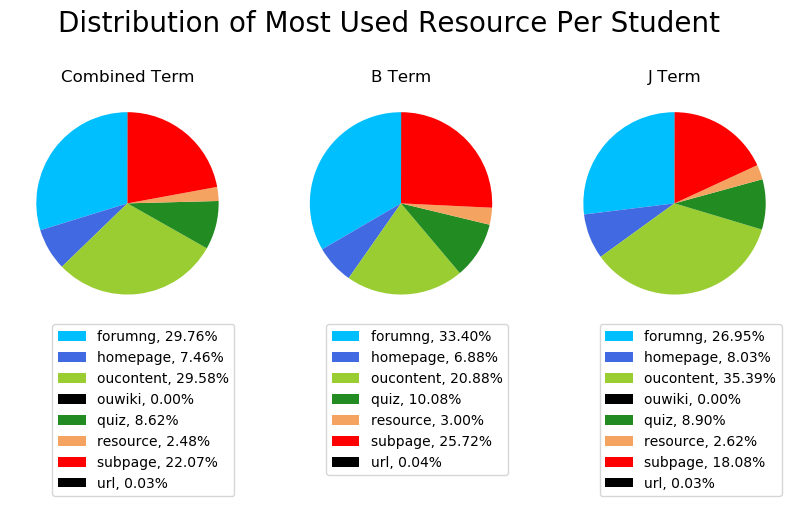

In [110]:
# distribution overview of newly engineered activity_type (mode) feature

# group combined set
act_grouped = app_data_df.groupby(
    by = "activity_type").count()["code_module"] # slice for arbitrary col, count is the same in every col

# create values and labels for legend
pie1_values = act_grouped / sum(act_grouped) * 100
pie1_labels = act_grouped.index

# group B term set
act_grouped_b = app_data_df_b.groupby(by = "activity_type").count()["code_module"]

# create values and labels for legend
pie2_values = act_grouped_b / sum(act_grouped_b) * 100
pie2_labels = act_grouped_b.index

# group J term set
act_grouped_j = app_data_df_j.groupby(by = "activity_type").count()["code_module"]

# create values and labels for legend
pie3_values = act_grouped_j / sum(act_grouped_j) * 100
pie3_labels = act_grouped_j.index


fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

# distribution of most used resources
ax1.pie(x = act_grouped, startangle = 90, colors =
        ["deepskyblue", "royalblue", "yellowgreen", "black", "forestgreen", "sandybrown", "red", "black"],
        pctdistance = 0.75)
ax1.set_title("Combined Term")
ax1.legend(bbox_to_anchor = (1, 0),
           labels = ["%s, %1.2f%%" % (lbl, p) for lbl, p in zip(pie1_labels, pie1_values)])

ax2.pie(x = act_grouped_b, startangle = 90, colors =
        ["deepskyblue", "royalblue", "yellowgreen", "forestgreen", "sandybrown", "red", "black"],
        pctdistance = 0.75)
ax2.set_title("B Term")
ax2.legend(bbox_to_anchor = (1, 0),
                 labels = ["%s, %1.2f%%" % (lbl, p) for lbl, p in zip(pie2_labels, pie2_values)])

ax3.pie(x = act_grouped_j, startangle = 90, colors =
        ["deepskyblue", "royalblue", "yellowgreen", "black", "forestgreen", "sandybrown", "red", "black"],
        pctdistance = 0.75)
ax3.set_title("J Term")
ax3.legend(bbox_to_anchor = (1, 0),
                 labels = ["%s, %1.2f%%" % (lbl, p) for lbl, p in zip(pie3_labels, pie3_values)])


fig.suptitle("Distribution of Most Used Resource Per Student", fontsize = 20)
plt.show()

The combined set naturally is a weighted average of the separate term sets, but we can see that there are, indeed, differences among the resources used. Students in the B term use, for instance, the forum and subpage more often, whereas students in J term definitely use content created by Open University more often.

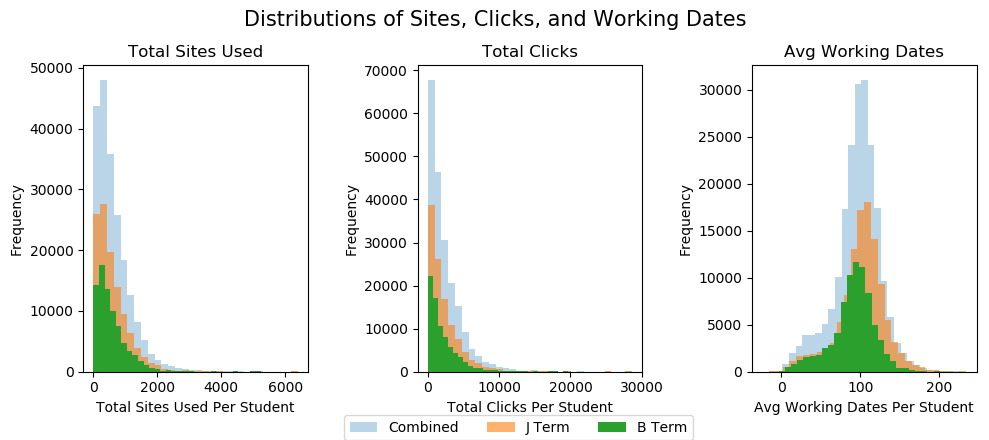

In [111]:
# histograms of new features

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

eng_cols = ["total_sites_used", "total_clicks", "avg_working_dates"]

ax1.hist(app_data_df["total_sites_used"], bins = 30, alpha = 0.3, label = "")
ax1.hist(app_data_df_j["total_sites_used"], bins = 30, alpha = 0.6, label = "")
ax1.hist(app_data_df_b["total_sites_used"], bins = 30, alpha = 1, label = "")
ax1.set_title("Total Sites Used")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Total Sites Used Per Student")

ax2.hist(app_data_df["total_clicks"], bins = 30, alpha = 0.3, label = "")
ax2.hist(app_data_df_j["total_clicks"], bins = 30, alpha = 0.6, label = "")
ax2.hist(app_data_df_b["total_clicks"], bins = 30, alpha = 1, label = "")
ax2.set_title("Total Clicks")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Total Clicks Per Student")

ax3.hist(app_data_df["avg_working_dates"], bins = 30, alpha = 0.3, label = "Combined")
ax3.hist(app_data_df_j["avg_working_dates"], bins = 30, alpha = 0.6, label = "J Term")
ax3.hist(app_data_df_b["avg_working_dates"], bins = 30, alpha = 1, label = "B Term")
ax3.set_title("Avg Working Dates")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Avg Working Dates Per Student")

fig.legend(bbox_to_anchor = (0.7, 0.08), ncol = 3)
fig.suptitle("Distributions of Sites, Clicks, and Working Dates", y = 1.05, size = 15)
plt.tight_layout() # avoids overlapping labels
plt.show()

As with the pie charts above, the combined set is a weighted average of the subsets. We can generally see that the J term has more students and activity than the B term. In the `Avg Working Dates` histogram we can see that students in the B term start working slightly earlier - on average - than in the J term. This shows again that the `B` term is shorter, thus exams are earlier, and consequently students need to start working earlier.

In [112]:
# save the files at this stage to work in another notebook
tr_data_df.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/tr_data_df.csv", index = False)
val_data_df.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/val_data_df.csv", index = False)
te_data_df.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/te_data_df.csv", index = False)

tr_data_df_b.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/tr_data_df_b.csv", index = False)
val_data_df_b.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/val_data_df_b.csv", index = False)
te_data_df_b.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/te_data_df_b.csv", index = False)

tr_data_df_j.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/tr_data_df_j.csv", index = False)
val_data_df_j.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/val_data_df_j.csv", index = False)
te_data_df_j.to_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/te_data_df_j.csv", index = False)